In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


**Exploratory Analysis**

In [ ]:
# Import a .csv file with ";" as delimiter
bd = pd.read_csv('bank-full.csv', delimiter=';')
pd.set_option('display.max_columns', None)

print(bd)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
# List the data types for all the columns
data_types = bd.dtypes

print(data_types)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
# Convert "yes"/"no" columns to boolean
yes_no_cols = ['default', 'housing', 'loan', 'y']
bd[yes_no_cols] = bd[yes_no_cols].replace({'yes': 1, 'no': 0})

In [ ]:
# Create a variable listing the columns in the dataset that are numeric
numeric_columns = bd.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Show descriptive statistics for numeric fields
numeric_stats = bd[numeric_columns].describe()

print(numeric_stats)

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419    258.163080      2.763841     40.197828      0.580323   
std        8.322476    257.527812      3.0

In [ ]:
pdays_nonegatives = bd['pdays'][bd['pdays'] >= 0]
pdays_nonegatives_stats = pdays_nonegatives.describe()
print(pdays_nonegatives_stats)

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64


In [ ]:
# Check for duplicates, errors, and null values
duplicates = bd[bd.duplicated()]
null_values = bd.isnull().sum()

print(duplicates)
print(null_values)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


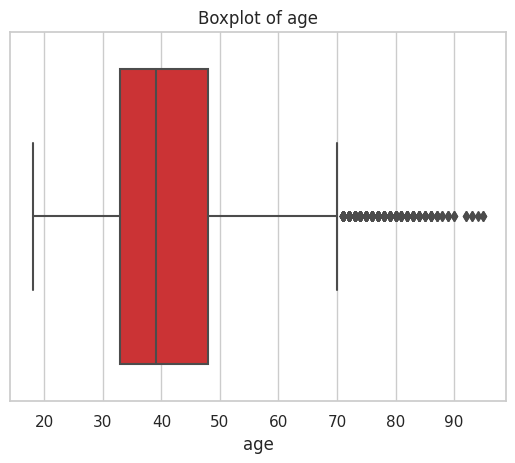

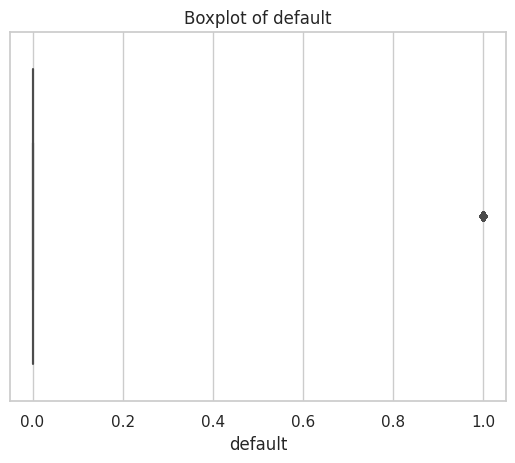

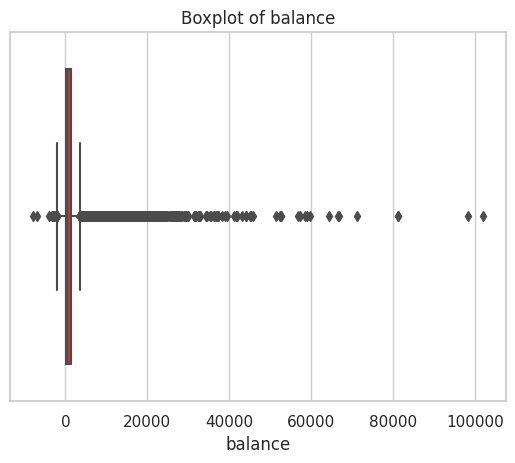

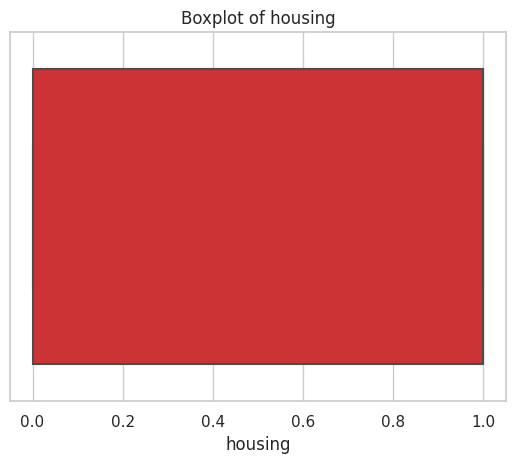

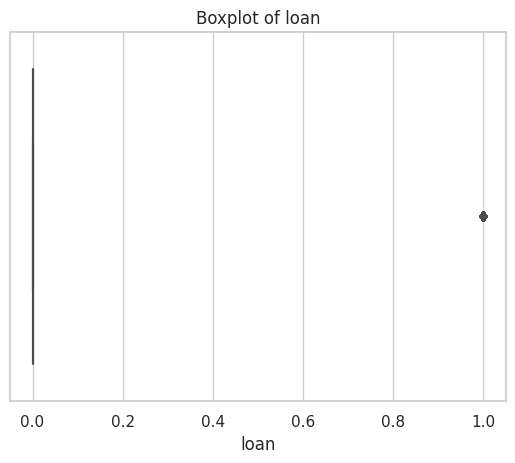

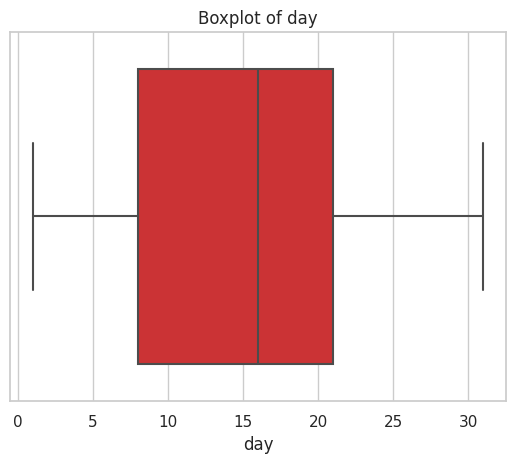

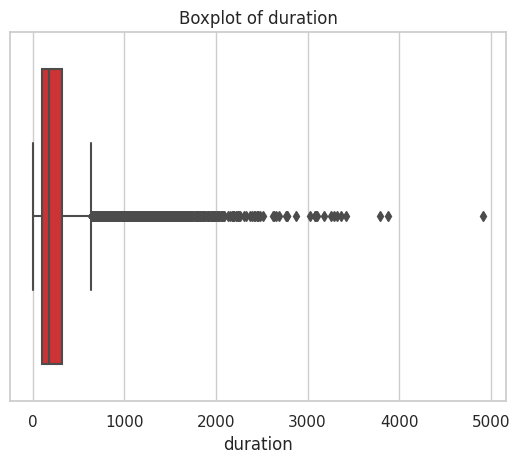

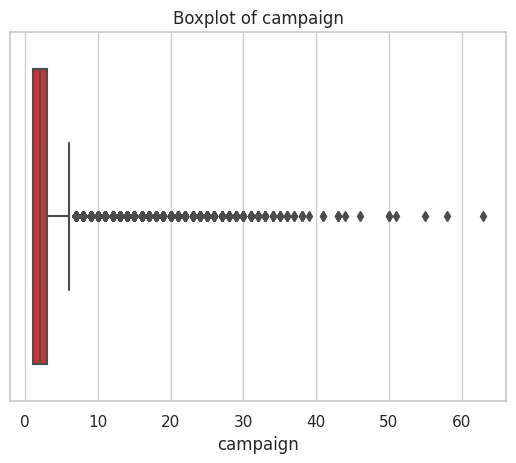

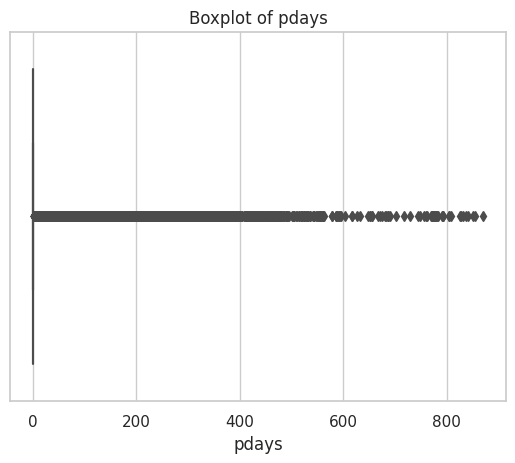

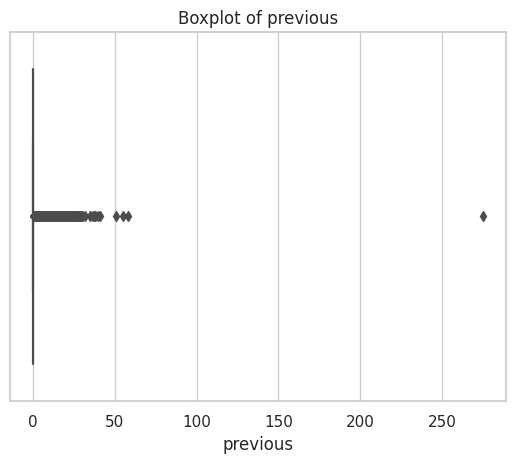

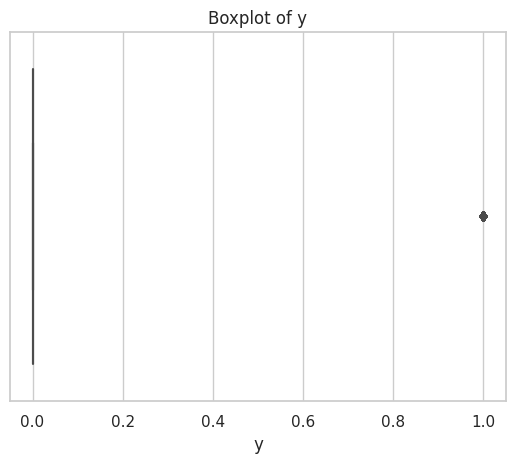

In [ ]:
# Show boxplots for numeric columns
for col in numeric_columns:
    sns.boxplot(x=bd[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


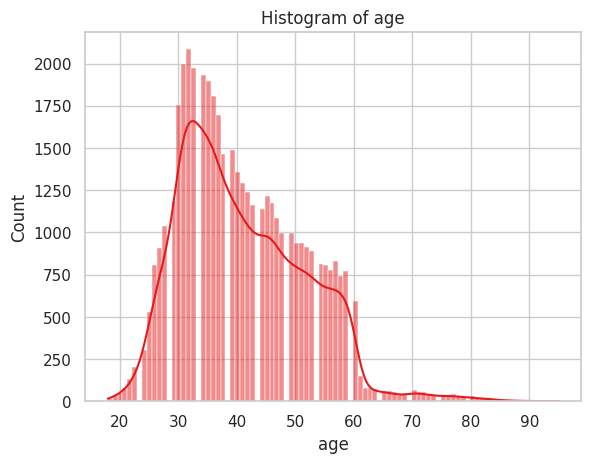

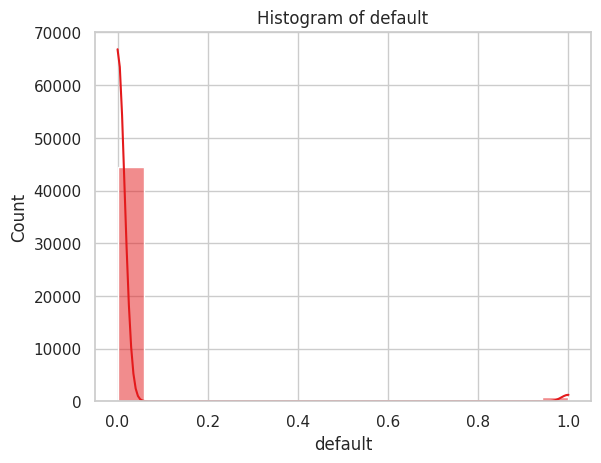

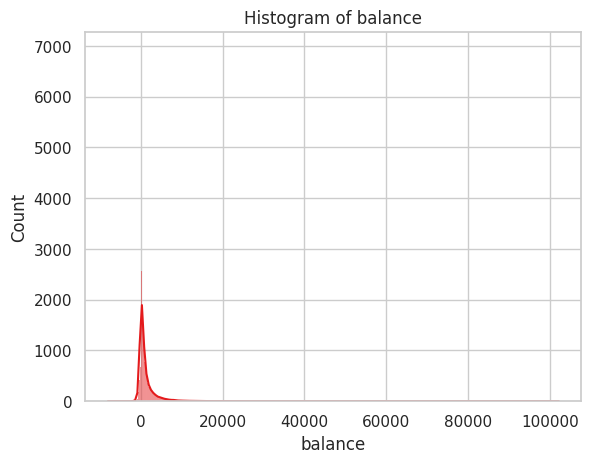

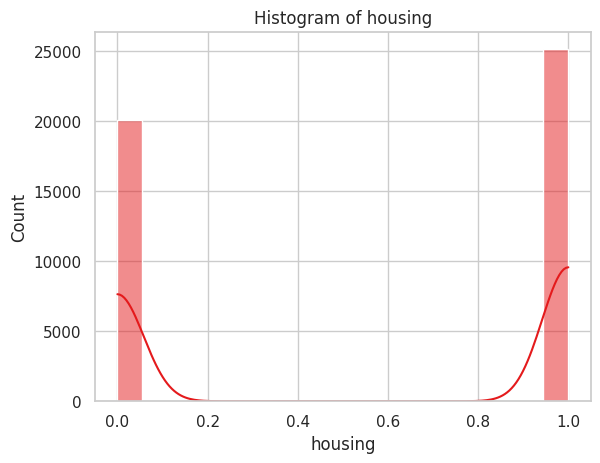

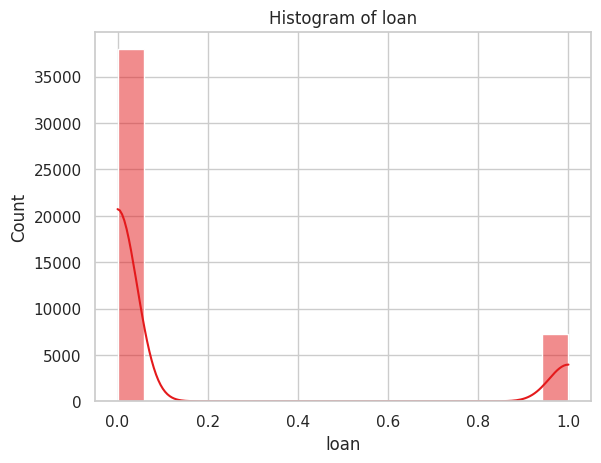

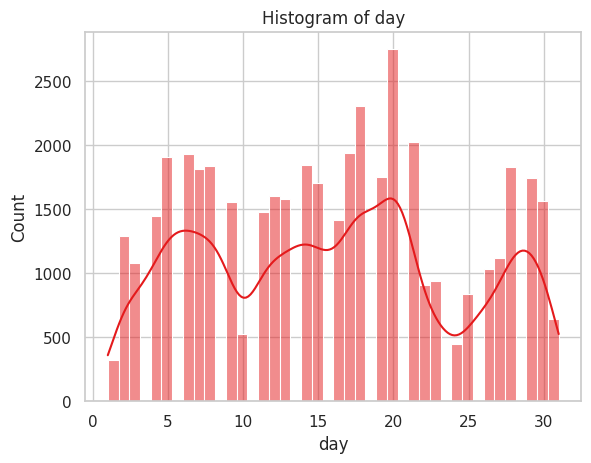

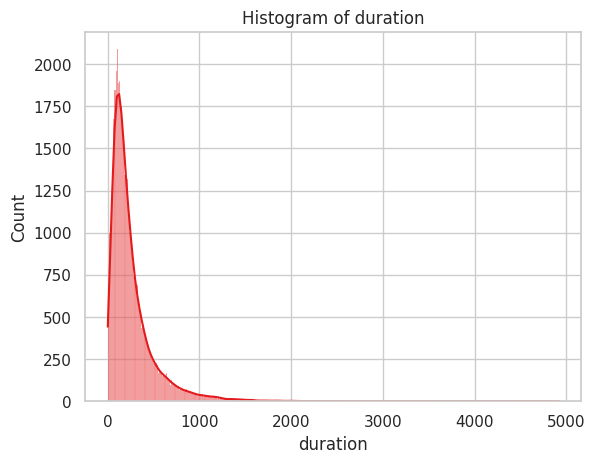

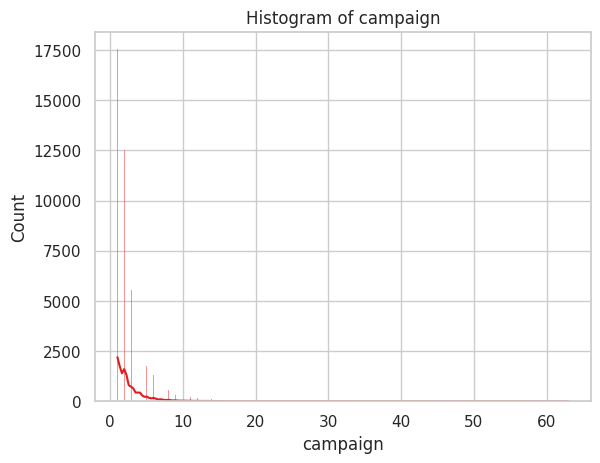

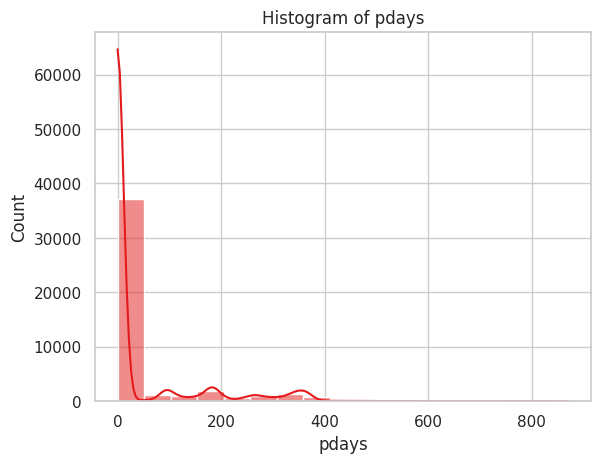

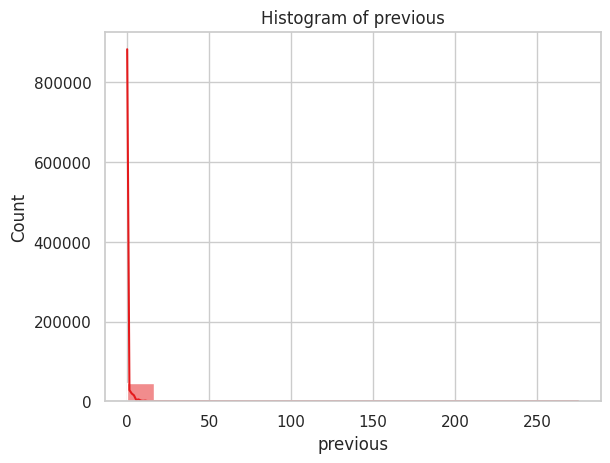

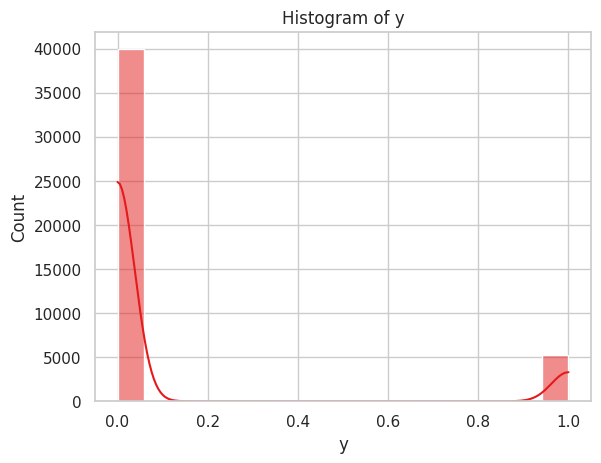

In [ ]:
# Show histograms for numeric columns
for col in numeric_columns:
    sns.histplot(bd[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


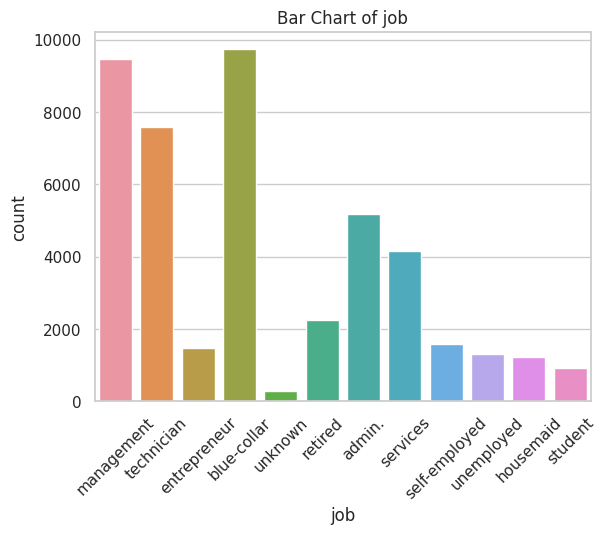

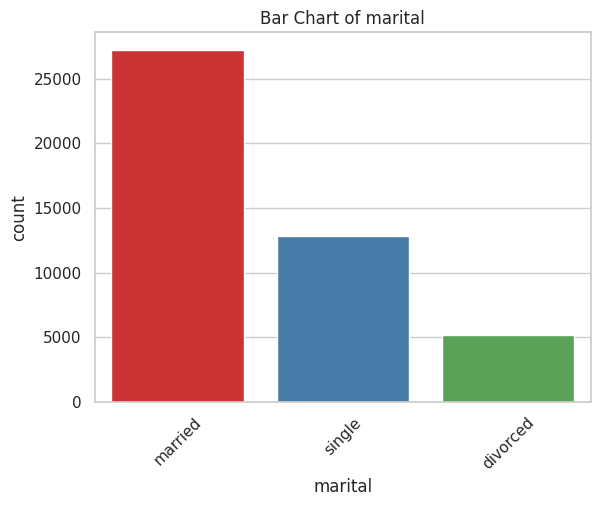

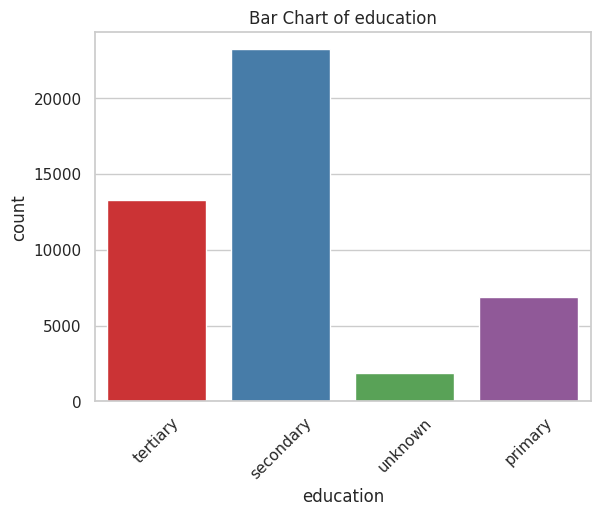

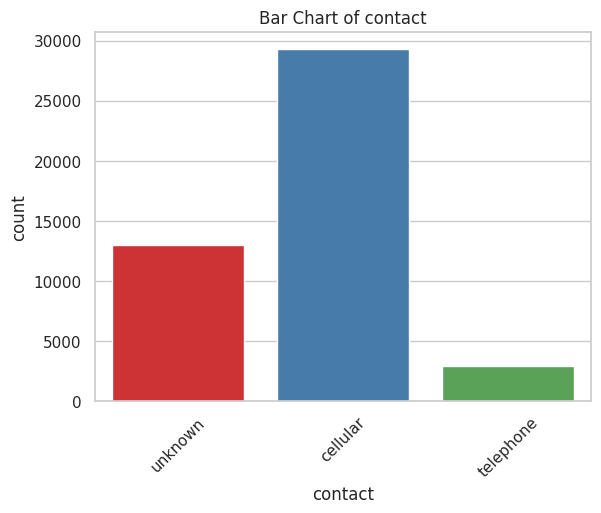

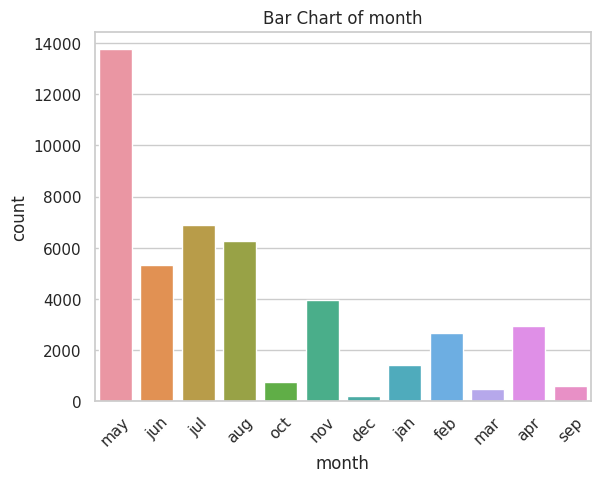

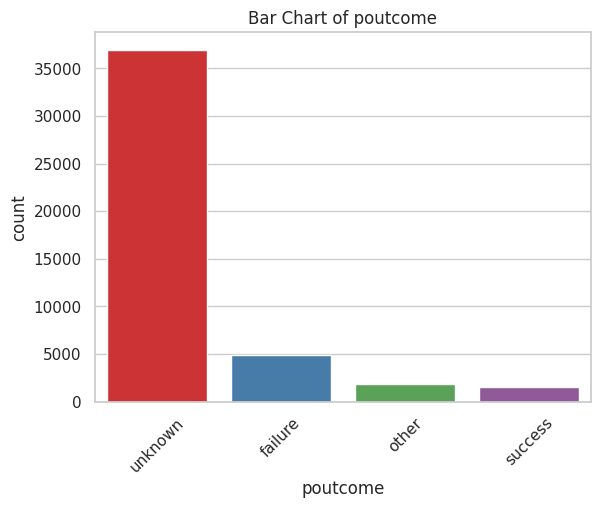

In [ ]:
# Show bar charts for categorical columns
categorical_columns = bd.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sns.countplot(data=bd, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

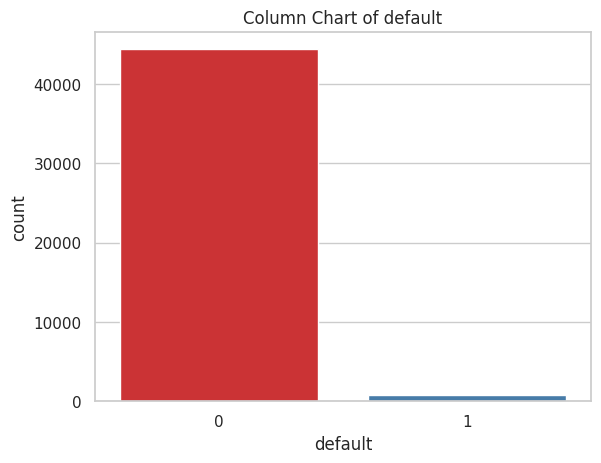

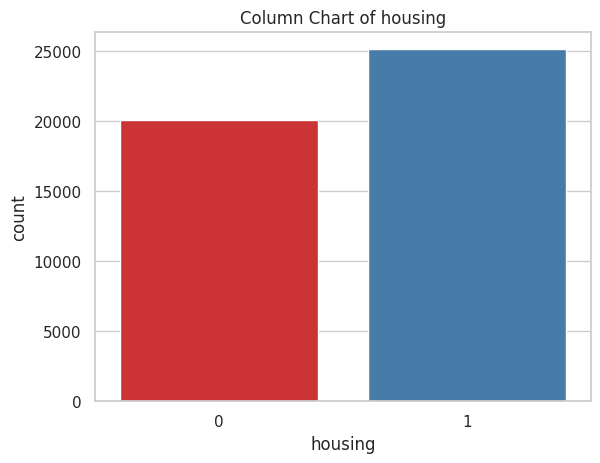

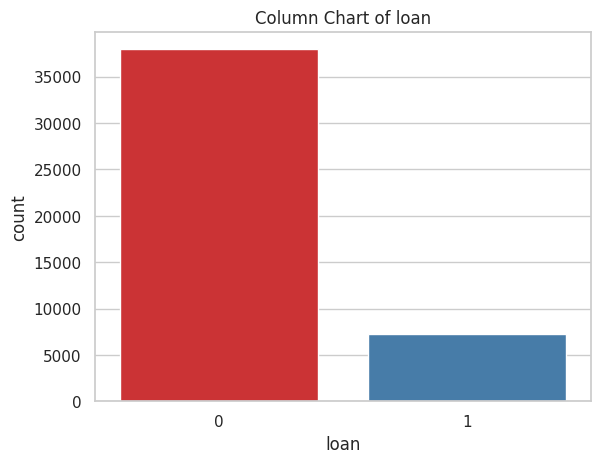

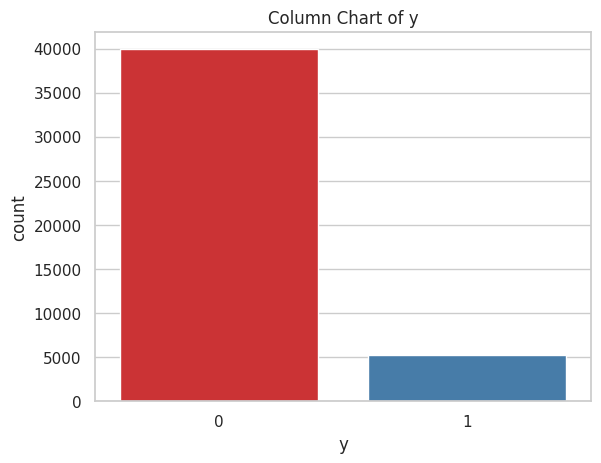

In [ ]:
# Show column charts for boolean columns
for col in yes_no_cols:
    sns.countplot(data=bd, x=col)
    plt.title(f'Column Chart of {col}')
    plt.show()


In [ ]:
pdays_counts = bd['pdays'].value_counts(normalize=True)

# Create a DataFrame to display both unique values and their proportions
pdays_counts_df = pd.DataFrame({'Pdays': pdays_counts.index, 'Proportion': pdays_counts.values})


pdays_counts_df = pdays_counts_df.sort_values(by='Pdays')

print(pdays_counts_df)


pdays_counts = bd['pdays'].value_counts().sort_values(ascending=False)


top_3_pdays = pdays_counts.head(3)
print(top_3_pdays)


     Pdays  Proportion
0       -1    0.817367
186      1    0.000332
58       2    0.000818
448      3    0.000022
382      4    0.000044
..     ...         ...
483    838    0.000022
472    842    0.000022
475    850    0.000022
477    854    0.000022
441    871    0.000022

[559 rows x 2 columns]
-1      36954
 182      167
 92       147
Name: pdays, dtype: int64


In [ ]:
previous_counts = bd['previous'].value_counts().reset_index()
previous_counts.columns = ['previous_value', 'count']

# Sort the values by count in descending order
previous_counts = previous_counts.sort_values(by='count', ascending=False)

# Display the sorted counts
print(previous_counts.head())


   previous_value  count
0               0  36954
1               1   2772
2               2   2106
3               3   1142
4               4    714


**Treating Numeric Variables**

Grouping numerical variables with many outliers (age, balance, campaign, pdays and previous)

In [ ]:
bd['age_group'] = pd.cut(
    bd['age'],
    bins=[17, 24, 34, 44, 59, 100],
    labels=['18-24', '25-34', '35-44', '45-59', '60+'],
    right=False
)
print(bd[['age', 'age_group']].head())



   age age_group
0   58     45-59
1   44     45-59
2   33     25-34
3   47     45-59
4   33     25-34


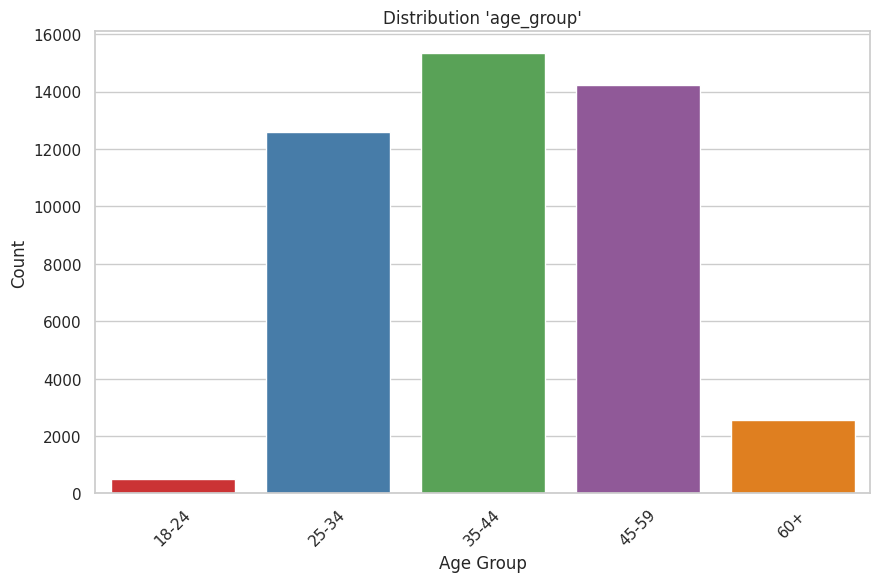

In [ ]:
age_group_counts = bd['age_group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set1")
plt.title("Distribution 'age_group'")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
min_balance =bd['balance'].min()
max_balance =bd['balance'].max()

print(f"Min 'balance': {min_balance}")
print(f"Max 'balance': {max_balance}")

# Grouping

intervals = [-8019, 0, 10000, 30000, float('inf')]

labels = ['-8019 ~ 0' , '0 ~ 10000', '10000 ~ 30000', '30000 +']

bd['balance_interval'] = pd.cut(bd['balance'], bins=intervals, labels=labels)


print(bd[['balance', 'balance_interval']])


Min 'balance': -8019
Max 'balance': 102127
       balance balance_interval
0         2143        0 ~ 10000
1           29        0 ~ 10000
2            2        0 ~ 10000
3         1506        0 ~ 10000
4            1        0 ~ 10000
...        ...              ...
45206      825        0 ~ 10000
45207     1729        0 ~ 10000
45208     5715        0 ~ 10000
45209      668        0 ~ 10000
45210     2971        0 ~ 10000

[45211 rows x 2 columns]


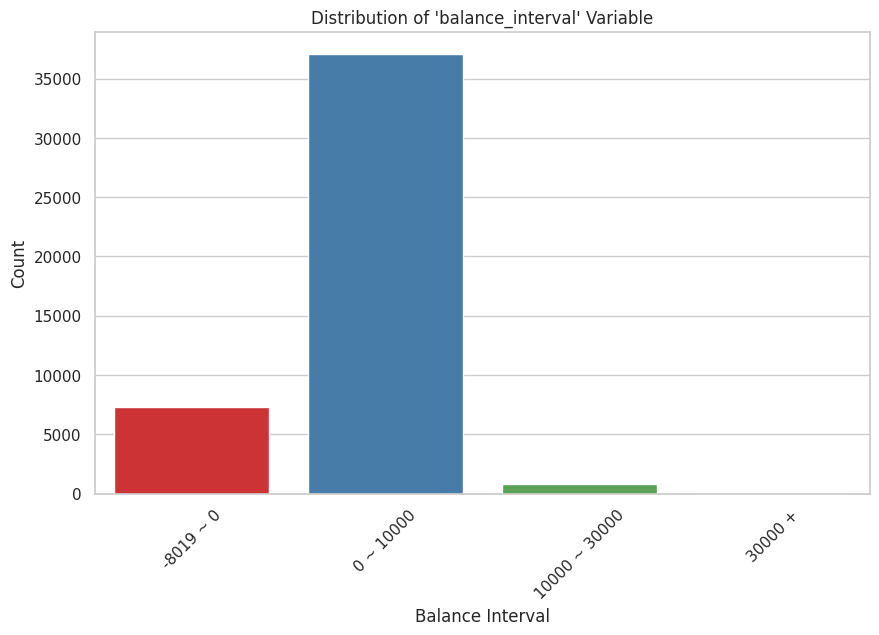

In [ ]:
# Count the occurrences of each category in 'balance_interval'
balance_interval_counts = bd['balance_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=balance_interval_counts.index, y=balance_interval_counts.values, palette="Set1")
plt.title("Distribution of 'balance_interval' Variable")
plt.xlabel("Balance Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
min_duration = bd['duration'].min()
max_duration = bd['duration'].max()

print(f"Min 'duration': {min_duration}")
print(f"Max 'duration': {max_duration}")

# Grouping

intervals = [0, 500, 1000, 2000, 4918]

labels = ['0 ~ 500', '500 ~ 1000', '1000 ~ 2000', '2000 +']

bd['duration_interval'] = pd.cut(bd['duration'], bins=intervals, labels=labels)

print(bd[['duration', 'duration_interval']])



Min 'duration': 0
Max 'duration': 4918
       duration duration_interval
0           261           0 ~ 500
1           151           0 ~ 500
2            76           0 ~ 500
3            92           0 ~ 500
4           198           0 ~ 500
...         ...               ...
45206       977        500 ~ 1000
45207       456           0 ~ 500
45208      1127       1000 ~ 2000
45209       508        500 ~ 1000
45210       361           0 ~ 500

[45211 rows x 2 columns]


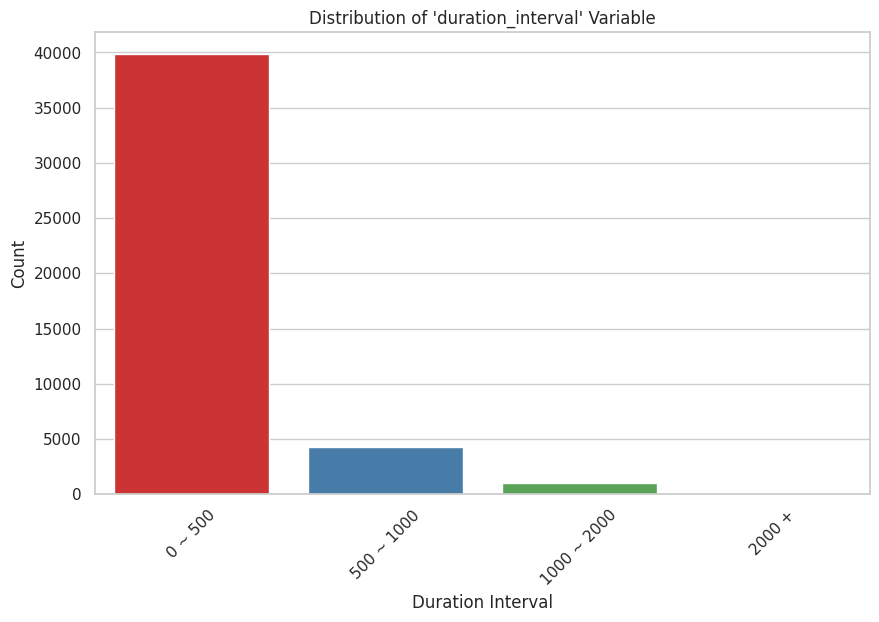

In [ ]:
# Count the occurrences of each category in 'duration_interval'
duration_interval_counts = bd['duration_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_interval_counts.index, y=duration_interval_counts.values, palette="Set1")
plt.title("Distribution of 'duration_interval' Variable")
plt.xlabel("Duration Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [ ]:
min_campaign = bd['campaign'].min()
max_campaign = bd['campaign'].max()

print(f"Min 'campaign': {min_campaign}")
print(f"Max 'campaign': {max_campaign}")

# Grouping

intervals = [0, 5, 10, 15, 63]

labels = ['0 ~ 5', '5 ~ 10', '10 ~ 15', '15 +']

bd['campaign_interval'] = pd.cut(bd['campaign'], bins=intervals, labels=labels)

print(bd[['campaign', 'campaign_interval']])

Min 'campaign': 1
Max 'campaign': 63
       campaign campaign_interval
0             1             0 ~ 5
1             1             0 ~ 5
2             1             0 ~ 5
3             1             0 ~ 5
4             1             0 ~ 5
...         ...               ...
45206         3             0 ~ 5
45207         2             0 ~ 5
45208         5             0 ~ 5
45209         4             0 ~ 5
45210         2             0 ~ 5

[45211 rows x 2 columns]


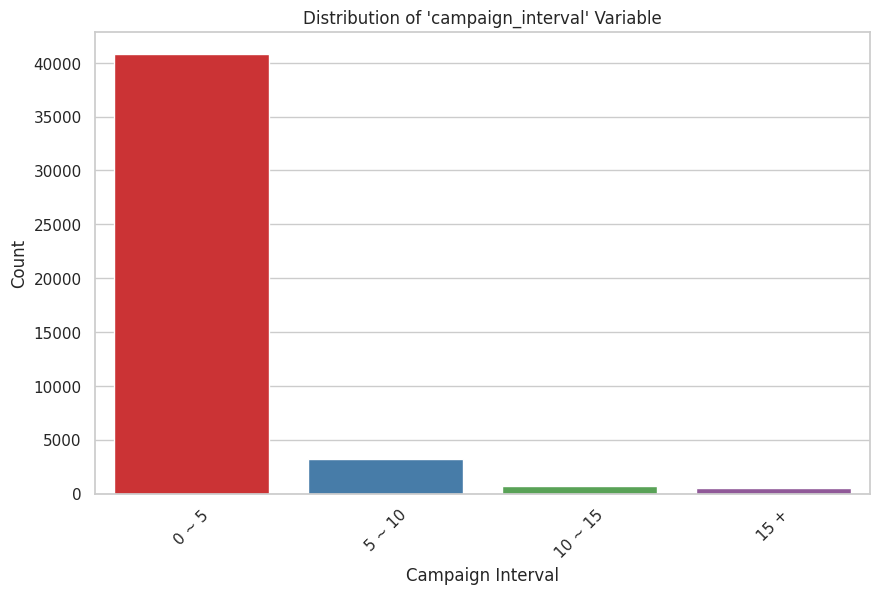

In [ ]:
# Count the occurrences of each category in 'campaign_interval'
campaign_interval_counts = bd['campaign_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_interval_counts.index, y=campaign_interval_counts.values, palette="Set1")
plt.title("Distribution of 'campaign_interval' Variable")
plt.xlabel("Campaign Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
min_pdays = bd['pdays'].min()
max_pdays = bd['pdays'].max()

print(f"Min 'pdays': {min_pdays}")
print(f"Max 'pdays': {max_pdays}")

# Grouping

intervals = [-2, 0, 100, 200, 300, 400, 871]

labels = ['-1 ~ 0', '0 ~ 100', '100 ~ 200', '200 ~ 300', '300 ~ 400', '400 +']

bd['pdays_interval'] = pd.cut(bd['pdays'], bins=intervals, labels=labels)

print(bd[['pdays', 'pdays_interval']])

Min 'pdays': -1
Max 'pdays': 871
       pdays pdays_interval
0         -1         -1 ~ 0
1         -1         -1 ~ 0
2         -1         -1 ~ 0
3         -1         -1 ~ 0
4         -1         -1 ~ 0
...      ...            ...
45206     -1         -1 ~ 0
45207     -1         -1 ~ 0
45208    184      100 ~ 200
45209     -1         -1 ~ 0
45210    188      100 ~ 200

[45211 rows x 2 columns]


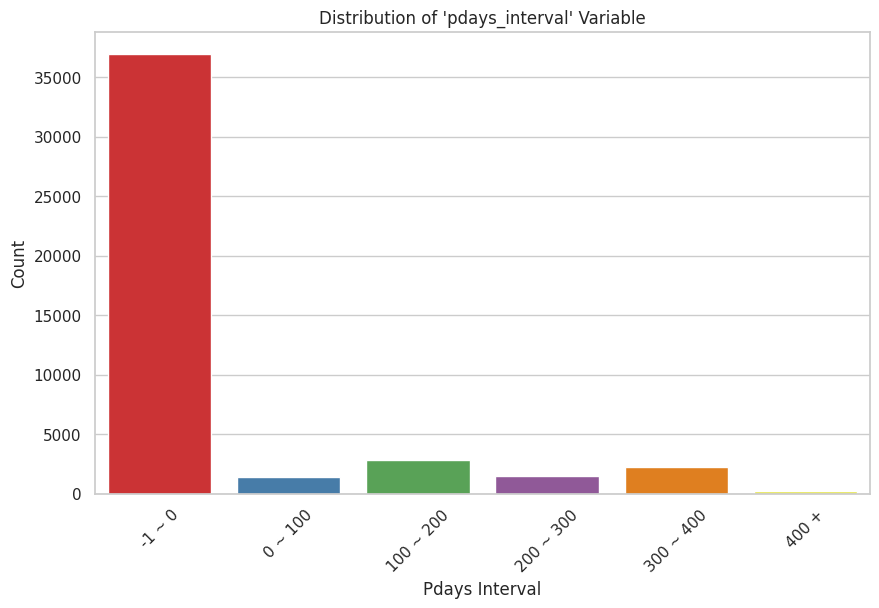

In [ ]:
# Count the occurrences of each category in 'pdays_interval'
pdays_interval_counts = bd['pdays_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=pdays_interval_counts.index, y=pdays_interval_counts.values, palette="Set1")
plt.title("Distribution of 'pdays_interval' Variable")
plt.xlabel("Pdays Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
min_previous = bd['previous'].min()
max_previous = bd['previous'].max()

print(f"Min 'previous': {min_previous}")
print(f"Max 'previous': {max_previous}")

# Grouping


intervals = [-1, 10, 20, 30, 40, 275]

labels = ['0 ~ 10', '10 ~ 20', '20 ~ 30', '30 ~ 40', '40 +']

bd['previous_interval'] = pd.cut(bd['previous'], bins=intervals, labels=labels)

print(bd[['previous', 'previous_interval']])


Min 'previous': 0
Max 'previous': 275
       previous previous_interval
0             0            0 ~ 10
1             0            0 ~ 10
2             0            0 ~ 10
3             0            0 ~ 10
4             0            0 ~ 10
...         ...               ...
45206         0            0 ~ 10
45207         0            0 ~ 10
45208         3            0 ~ 10
45209         0            0 ~ 10
45210        11           10 ~ 20

[45211 rows x 2 columns]


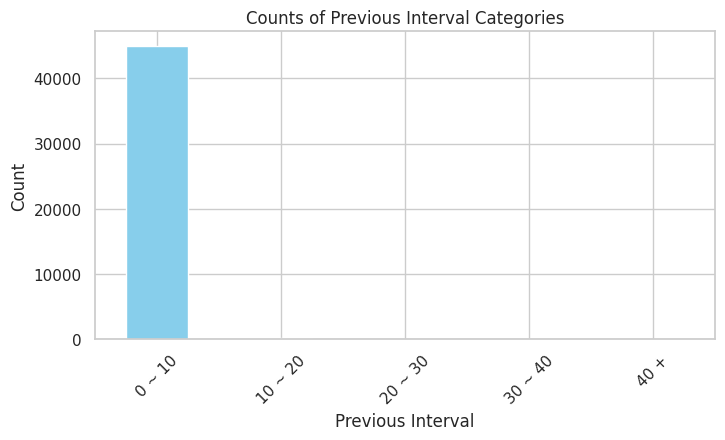

In [ ]:
previous_interval_counts = bd['previous_interval'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 4))
previous_interval_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Previous Interval Categories')
plt.xlabel('Previous Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Treating Categorical Variables**

In [ ]:
unique_jobs = bd['job'].unique()
print(unique_jobs)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [ ]:
# Grouping job variable
bd_manuallabor = bd[(bd['job'] == 'blue-collar') | (bd['job'] == 'housemaid')]
bd_employee = bd[(bd['job'] == 'admin.') | (bd['job'] == 'services') | (bd['job'] == 'technician') | (bd['job'] == 'management')]
bd_selfemployed = bd[(bd['job'] == 'entrepreneur') | (bd['job'] == 'self-employed') ]
bd_student = bd[(bd['job'] == 'student')]
bd_retired = bd[(bd['job'] == 'retired')]
bd_unemployed = bd[(bd['job'] == 'unemployed')]

# Update 'job' column with grouped categories
bd.loc[bd_manuallabor.index, 'job'] = 'Manual Labour'
bd.loc[bd_employee.index, 'job'] = 'Employee'
bd.loc[bd_selfemployed.index, 'job'] = 'Self Employed'
bd.loc[bd_student.index, 'job'] = 'Student'
bd.loc[bd_retired.index, 'job'] = 'Retired'
bd.loc[bd_unemployed.index, 'job'] = 'Unemployed'

print(bd.job)


0             Employee
1             Employee
2        Self Employed
3        Manual Labour
4              unknown
             ...      
45206         Employee
45207          Retired
45208          Retired
45209    Manual Labour
45210    Self Employed
Name: job, Length: 45211, dtype: object


In [ ]:
job_percentages = (bd['job'].value_counts() / len(bd)) * 100
education_percentages = (bd['education'].value_counts() / len(bd)) * 100

print(job_percentages)
print(education_percentages)

# The percentage of unknown values in job and education are low, so I will keep them

Employee         58.348632
Manual Labour    24.268430
Self Employed     6.781535
Retired           5.007631
Unemployed        2.882042
Student           2.074716
unknown           0.637013
Name: job, dtype: float64
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64


In [ ]:
# ONE-HOT ENCODING

# List of categorical variables to be transformed
categorical_columns = ["job", "marital", "education", "contact", "month", "poutcome","age_group", "balance_interval","duration_interval","campaign_interval","pdays_interval","previous_interval"]

# Perform one-hot encoding transformation for each categorical variable
bd = pd.get_dummies(bd, columns=categorical_columns)

# Display the resulting DataFrame
print(bd.head())


   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  y  job_Employee  job_Manual Labour  job_Retired  \
0         0  0             1                  0            0   
1         0  0             1                  0            0   
2         0  0             0                  0            0   
3         0  0             0                  1            0   
4         0  0             0                  0            0   

   job_Self Employed  job_Student  job_Unemployed  job_unknown  \
0                  0            0               0            0   
1                  0            

In [ ]:
total_columns = len(bd.columns)

numeric_columns = bd.select_dtypes(include=['number'])

num_numeric_columns = numeric_columns.shape[1]

num_categorical_columns = total_columns - num_numeric_columns

print(f"Total Columns: {total_columns}")
print(f"Total Numerics: {num_numeric_columns}")
print(f"Total Categorical: {num_categorical_columns}")

Total Columns: 72
Total Numerics: 72
Total Categorical: 0


In [ ]:
# Drop columns

bd = bd.drop(columns=['age'])
bd = bd.drop(columns=['balance'])
bd = bd.drop(columns=['duration'])
bd = bd.drop(columns=['campaign'])
bd = bd.drop(columns=['pdays'])
bd = bd.drop(columns=['previous'])

print(bd.head())

   default  housing  loan  day  y  job_Employee  job_Manual Labour  \
0        0        1     0    5  0             1                  0   
1        0        1     0    5  0             1                  0   
2        0        1     1    5  0             0                  0   
3        0        1     0    5  0             0                  1   
4        0        0     0    5  0             0                  0   

   job_Retired  job_Self Employed  job_Student  job_Unemployed  job_unknown  \
0            0                  0            0               0            0   
1            0                  0            0               0            0   
2            0                  1            0               0            0   
3            0                  0            0               0            0   
4            0                  0            0               0            1   

   marital_divorced  marital_married  marital_single  education_primary  \
0                 0          

In [ ]:
total_columns = len(bd.columns)

numeric_columns = bd.select_dtypes(include=['number'])

num_numeric_columns = numeric_columns.shape[1]

num_categorical_columns = total_columns - num_numeric_columns

print(f"Total Columns: {total_columns}")
print(f"Total Numerics: {num_numeric_columns}")
print(f"Total Categorical: {num_categorical_columns}")

Total Columns: 66
Total Numerics: 66
Total Categorical: 0


In [ ]:
numeric_stats = bd.describe()
print(numeric_stats)

            default       housing          loan           day             y  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.018027      0.555838      0.160226     15.806419      0.116985   
std        0.133049      0.496878      0.366820      8.322476      0.321406   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        0.000000      0.000000      0.000000      8.000000      0.000000   
50%        0.000000      1.000000      0.000000     16.000000      0.000000   
75%        0.000000      1.000000      0.000000     21.000000      0.000000   
max        1.000000      1.000000      1.000000     31.000000      1.000000   

       job_Employee  job_Manual Labour   job_Retired  job_Self Employed  \
count  45211.000000       45211.000000  45211.000000       45211.000000   
mean       0.583486           0.242684      0.050076           0.067815   
std        0.492986           0.428711      0.218105           

**Bivariate analysis**

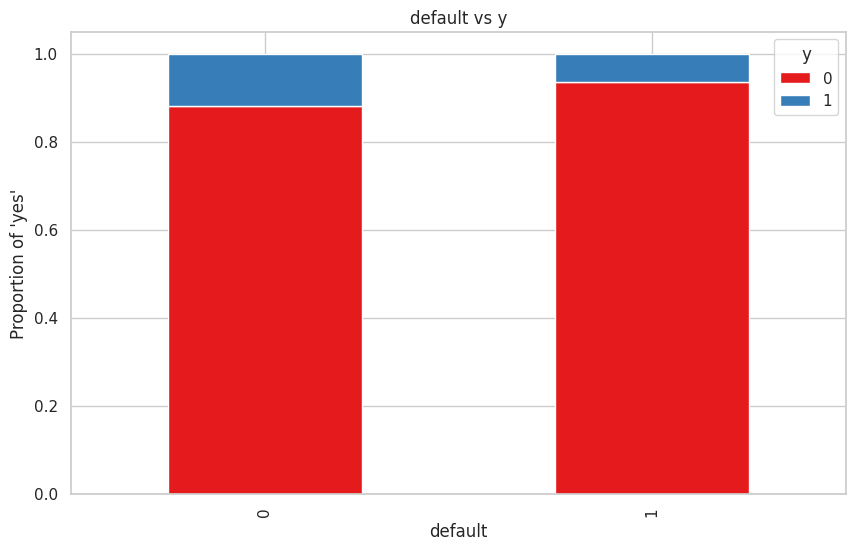

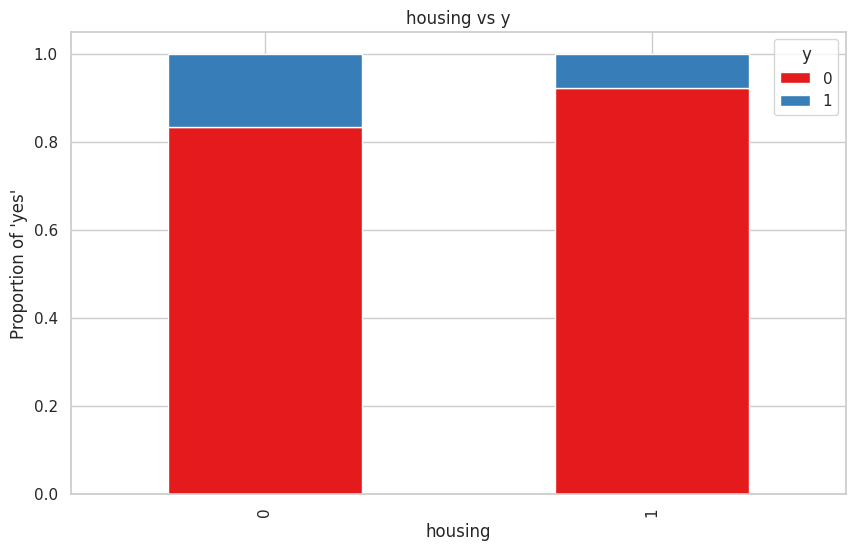

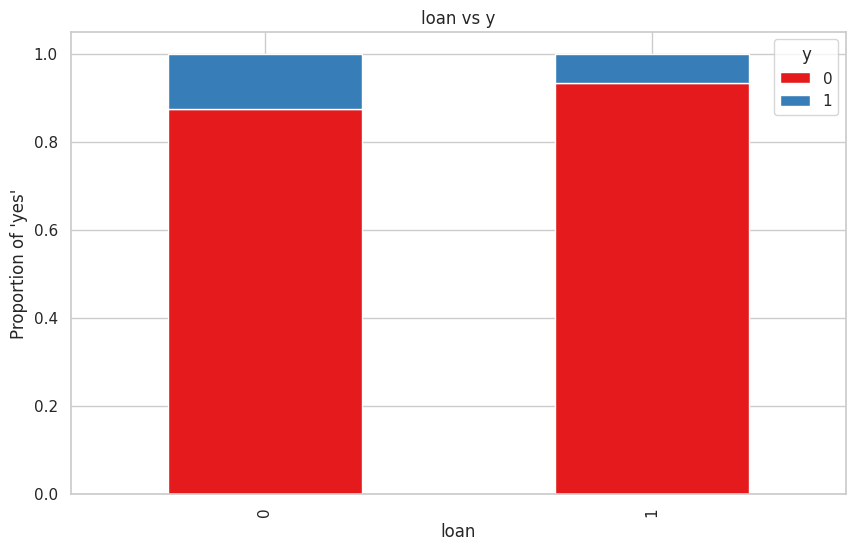

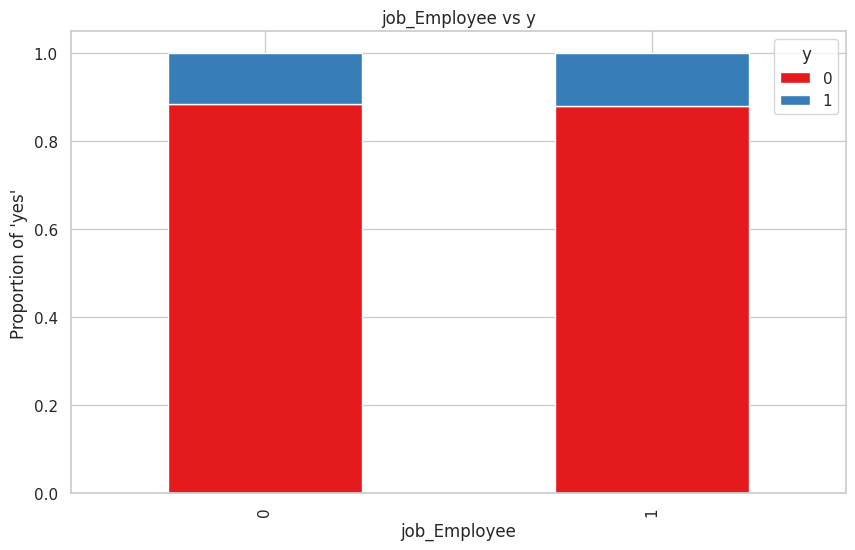

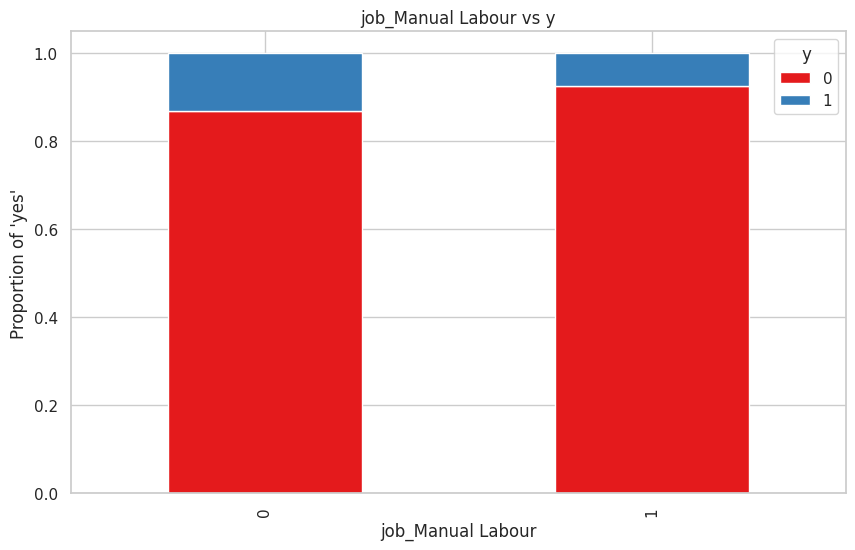

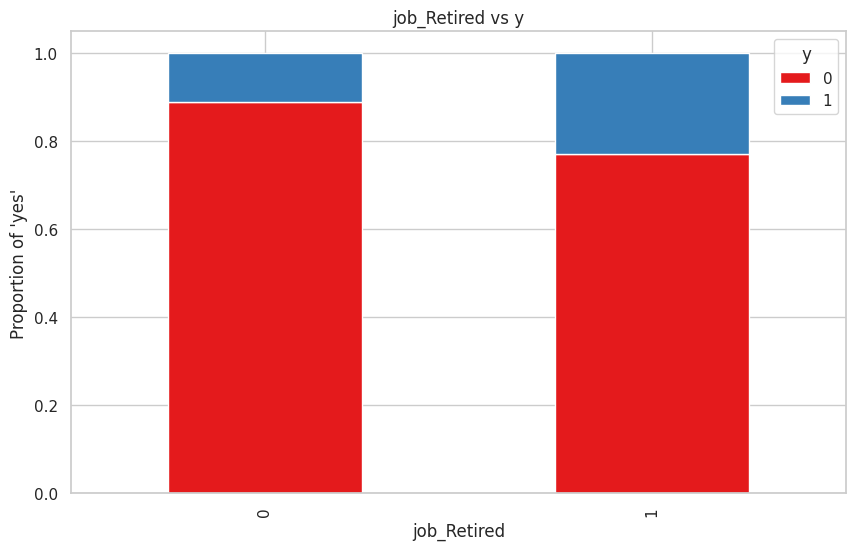

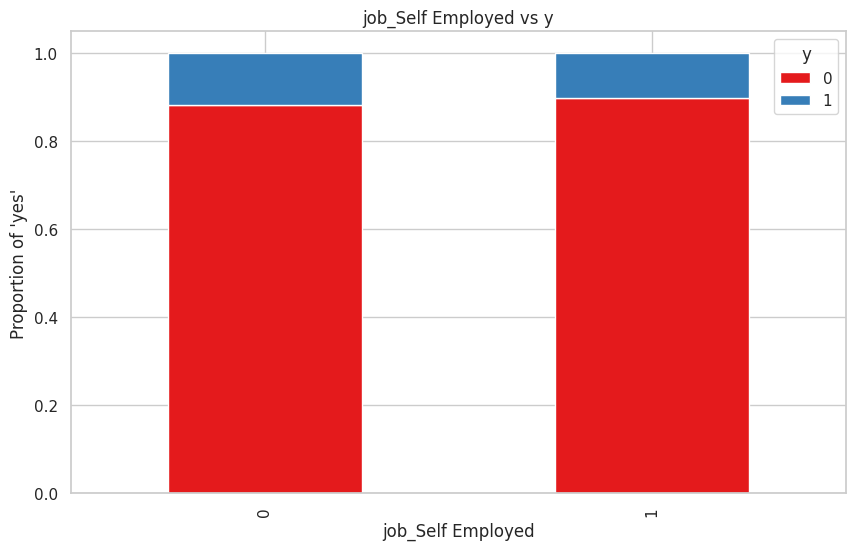

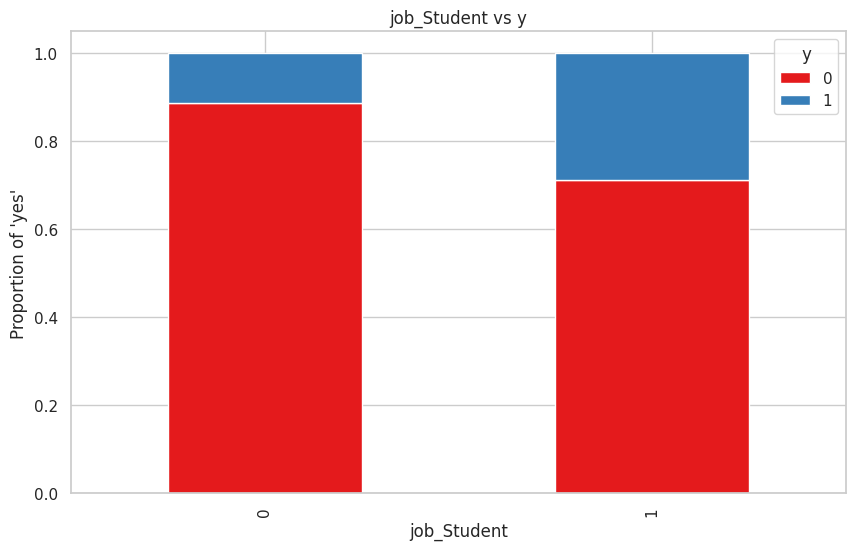

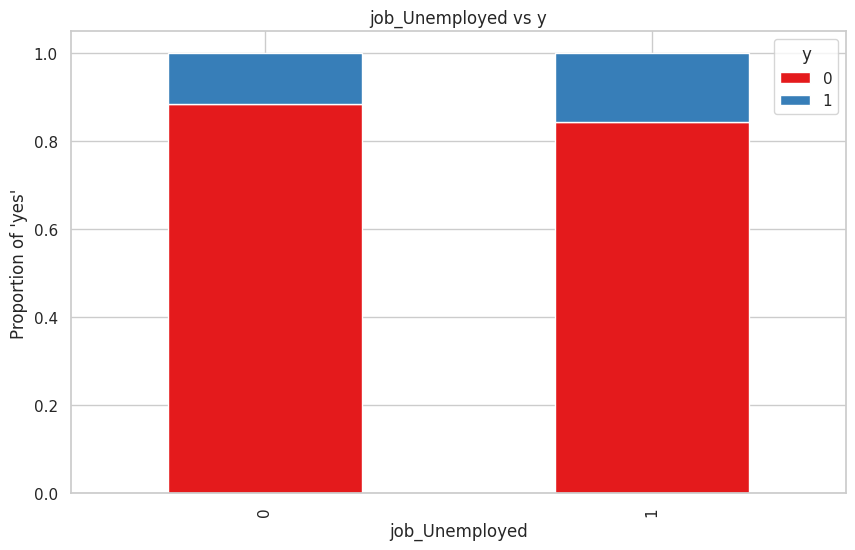

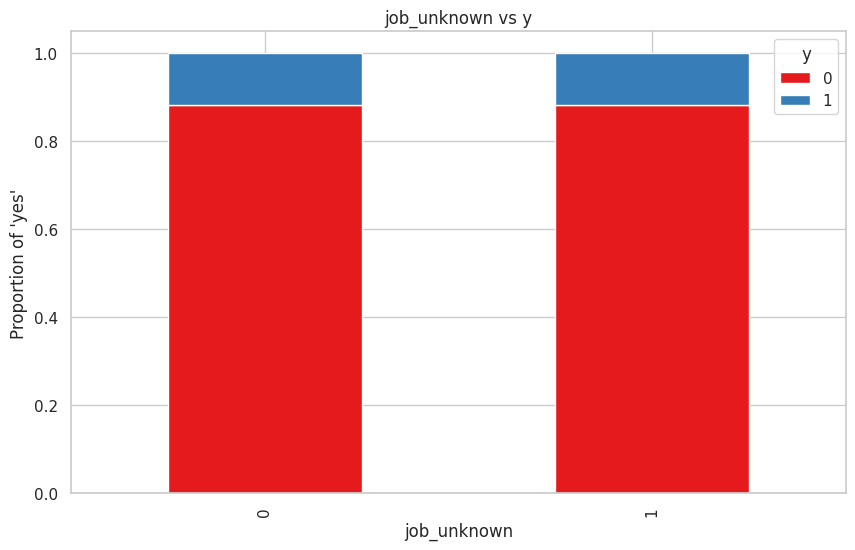

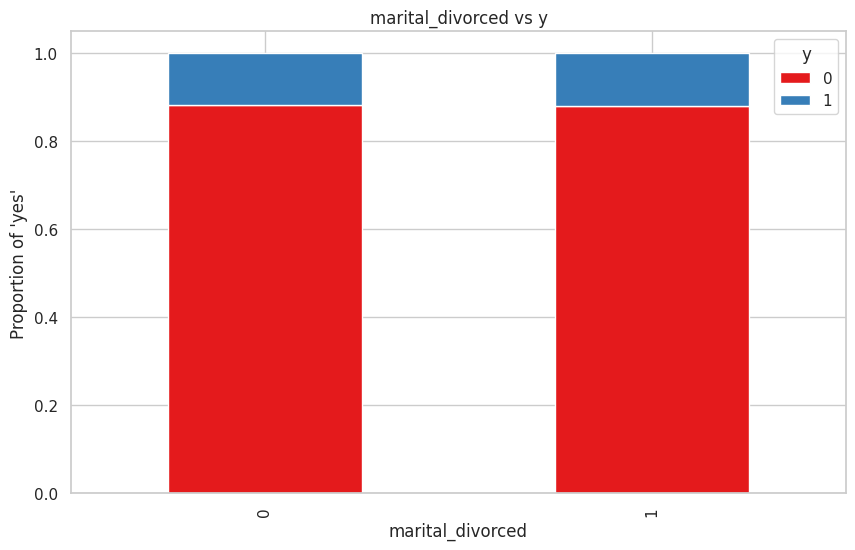

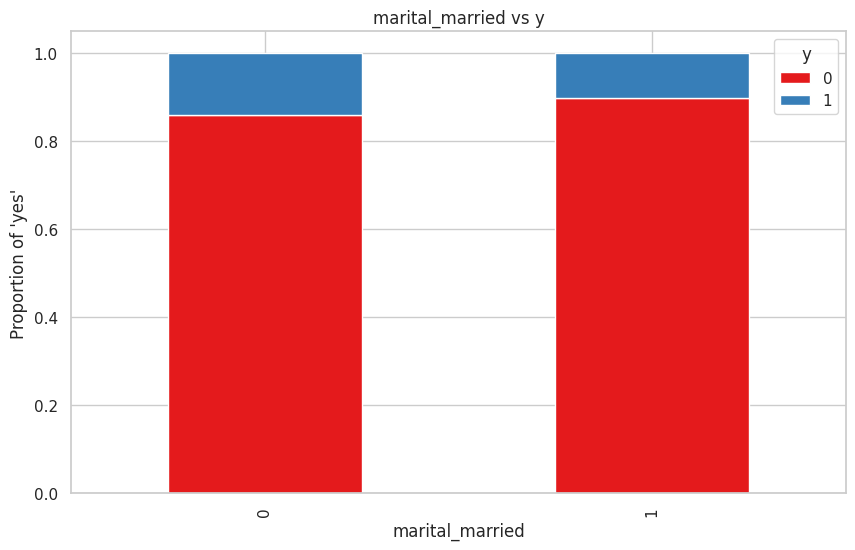

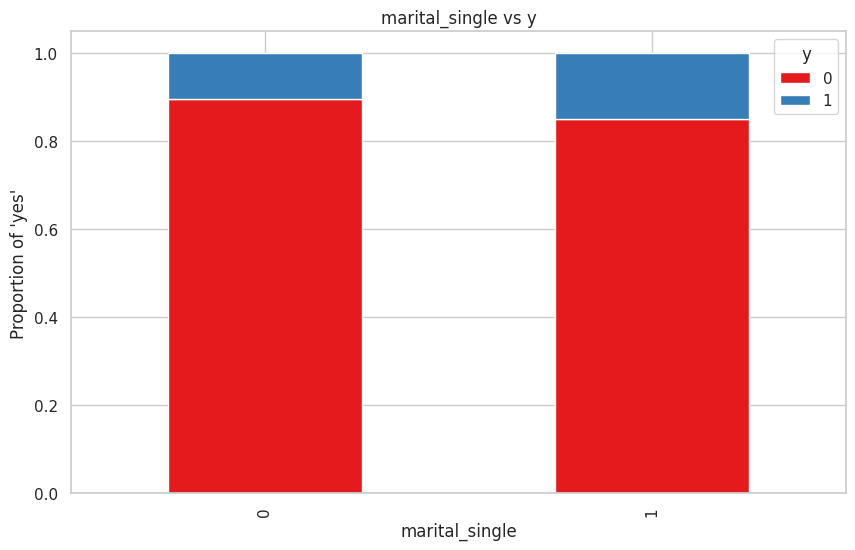

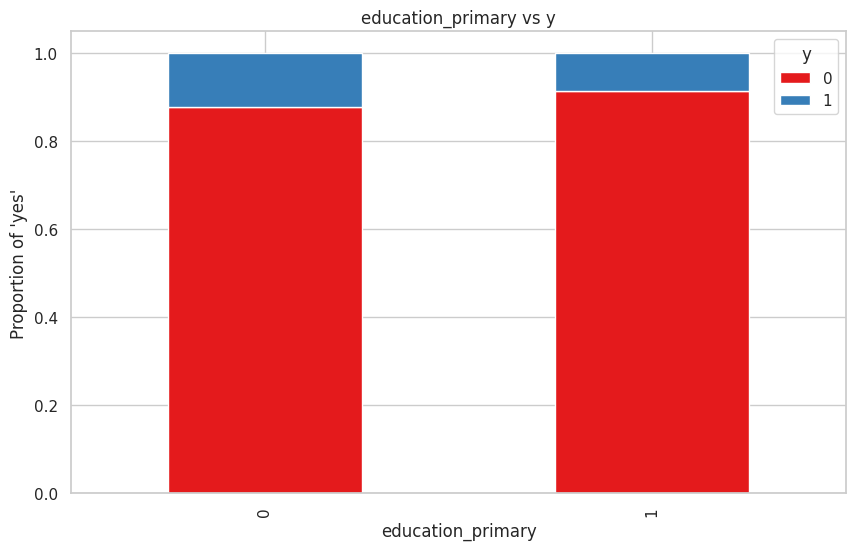

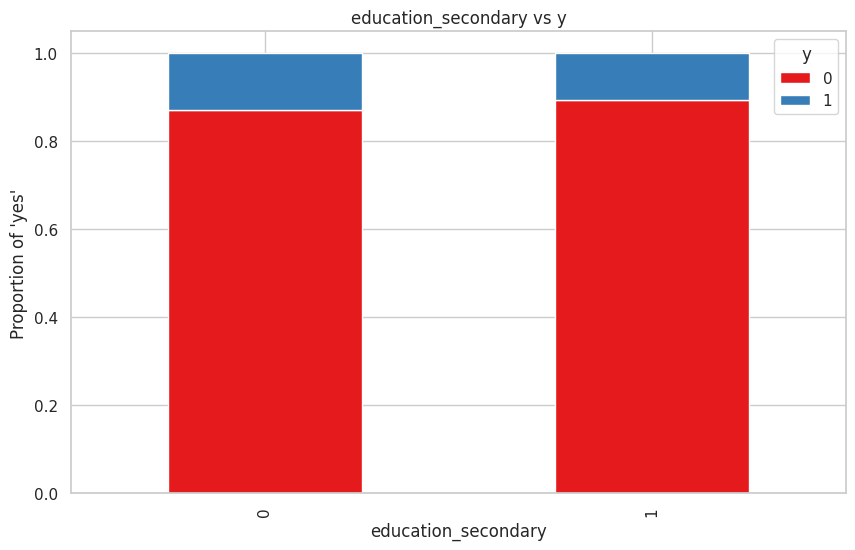

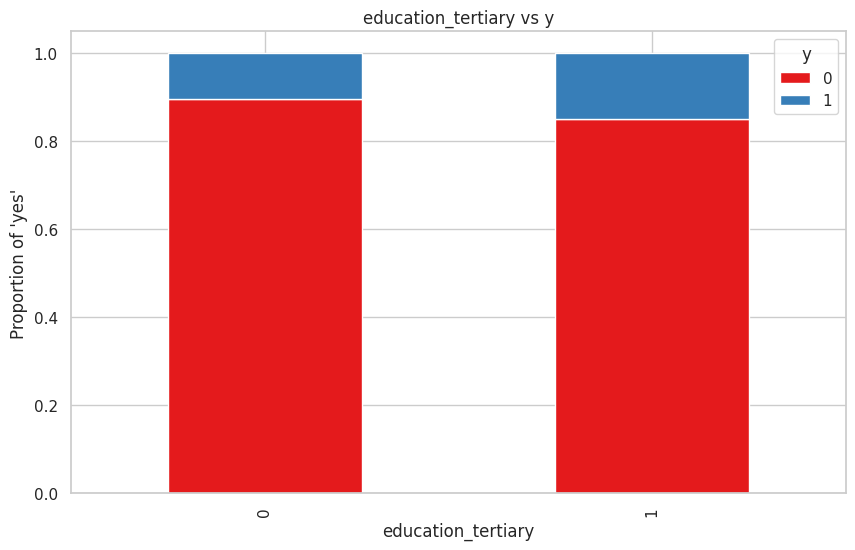

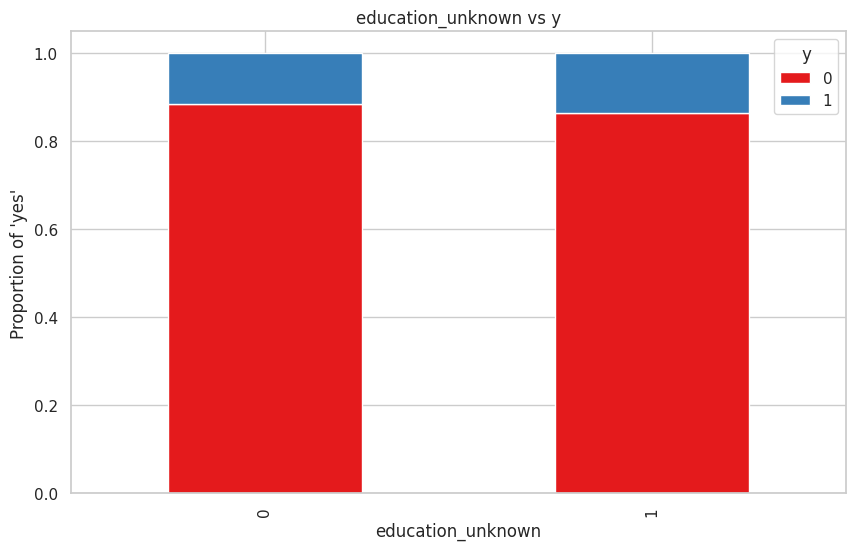

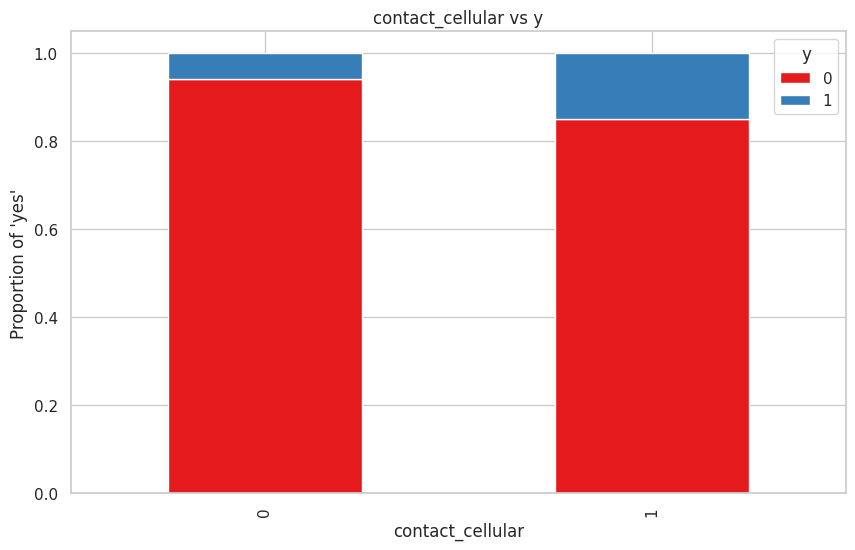

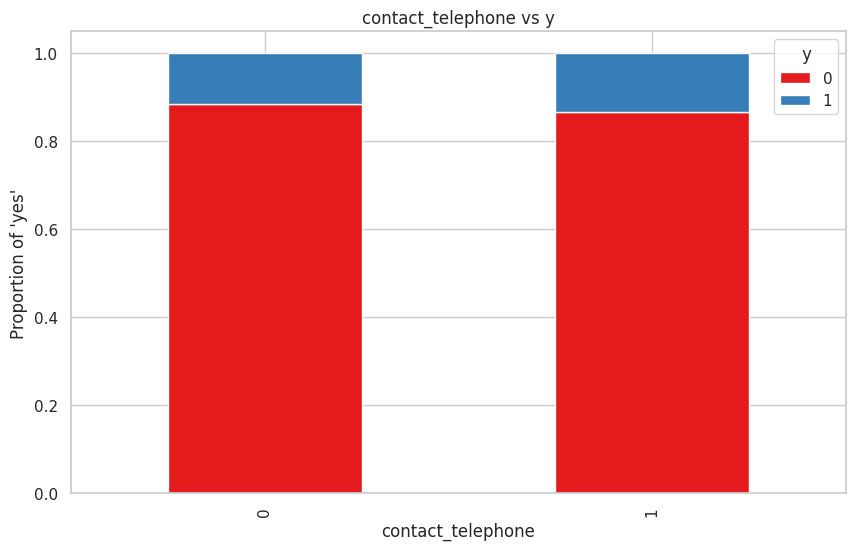

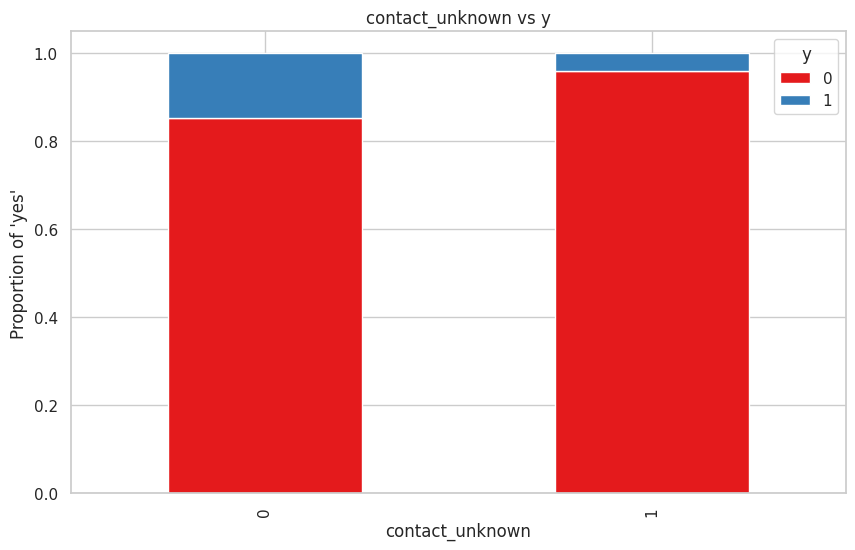

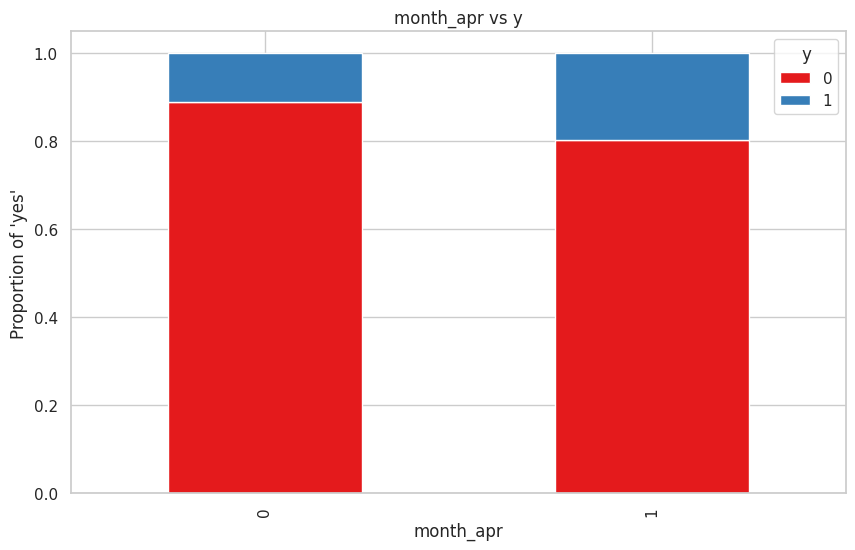

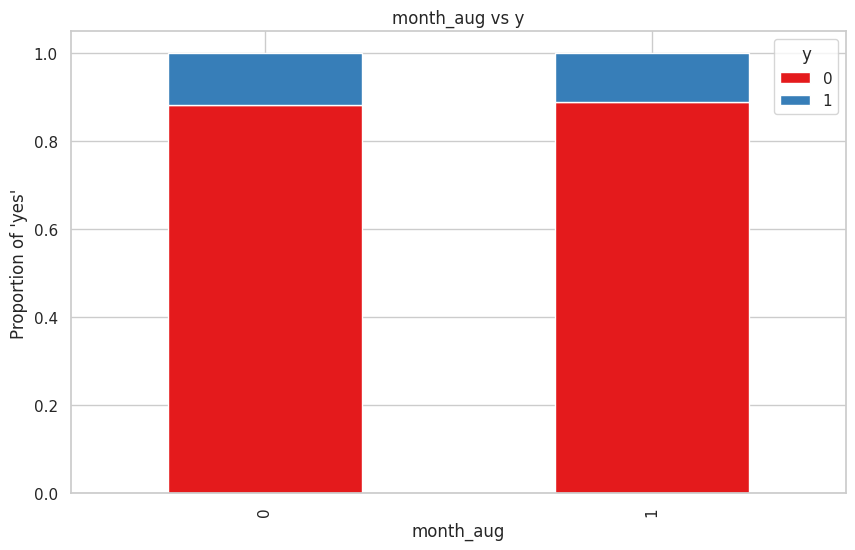

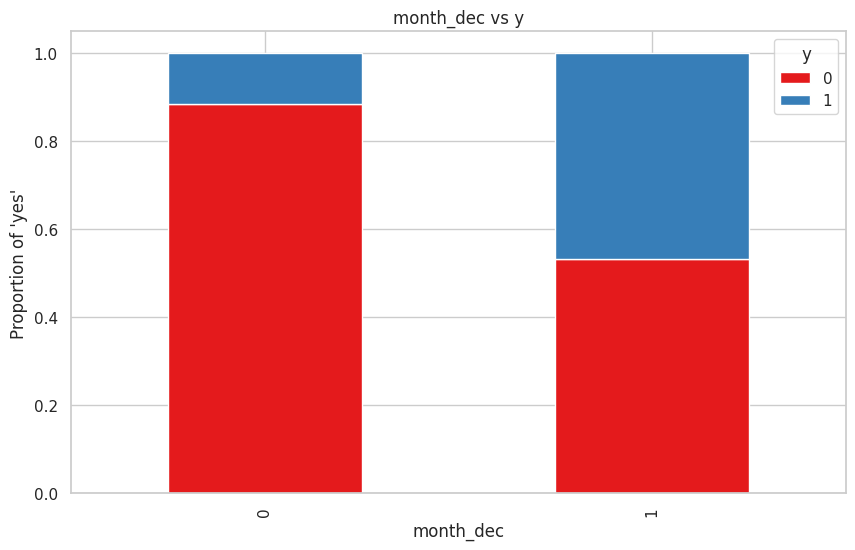

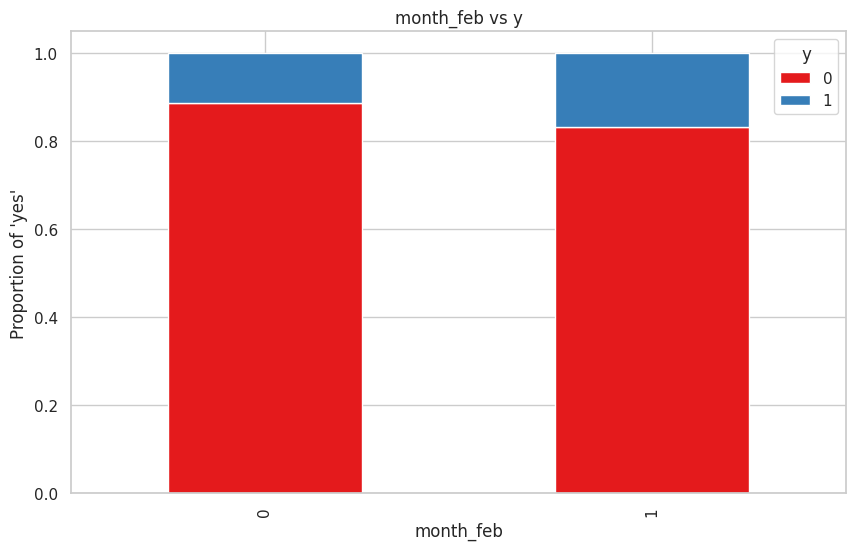

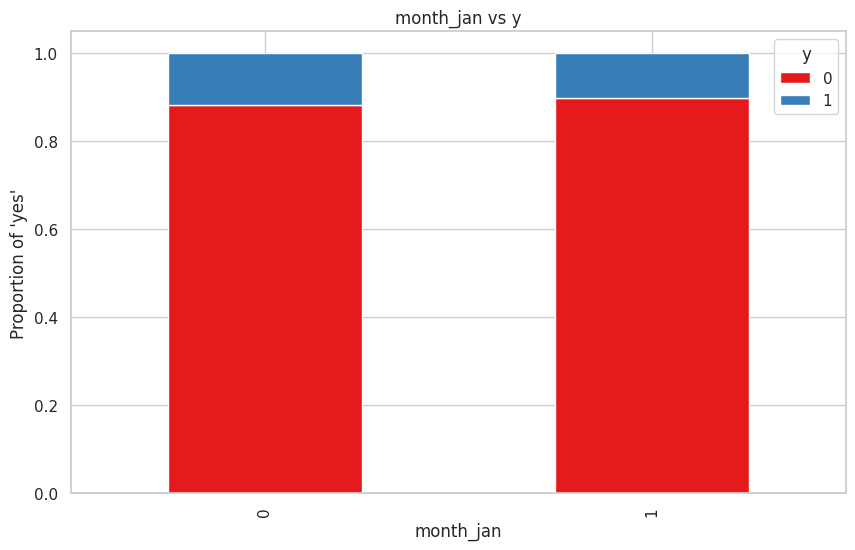

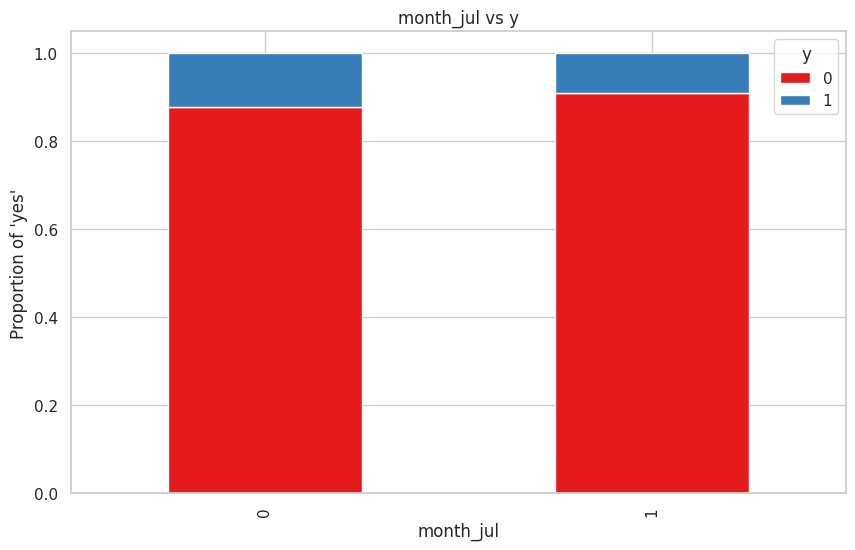

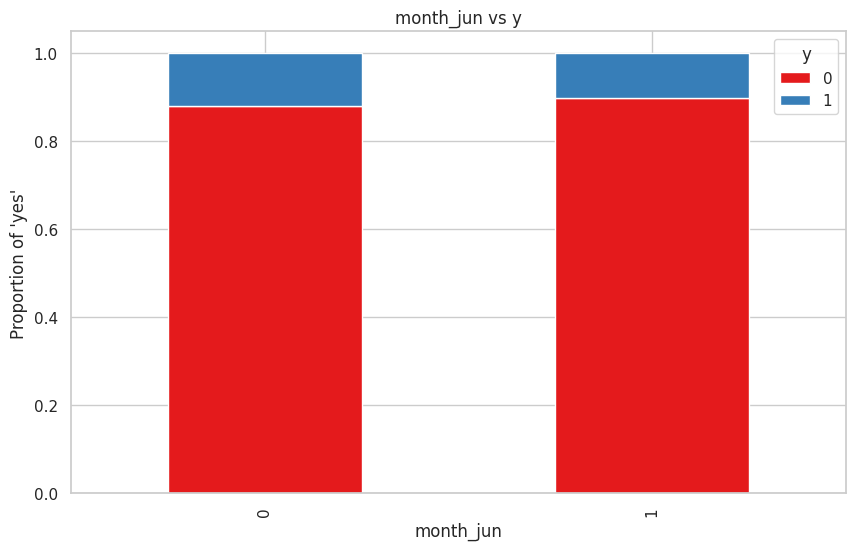

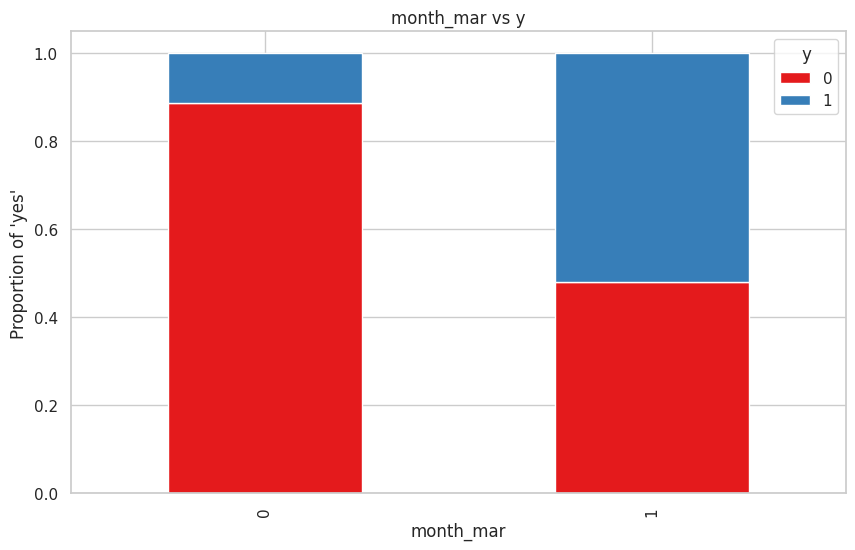

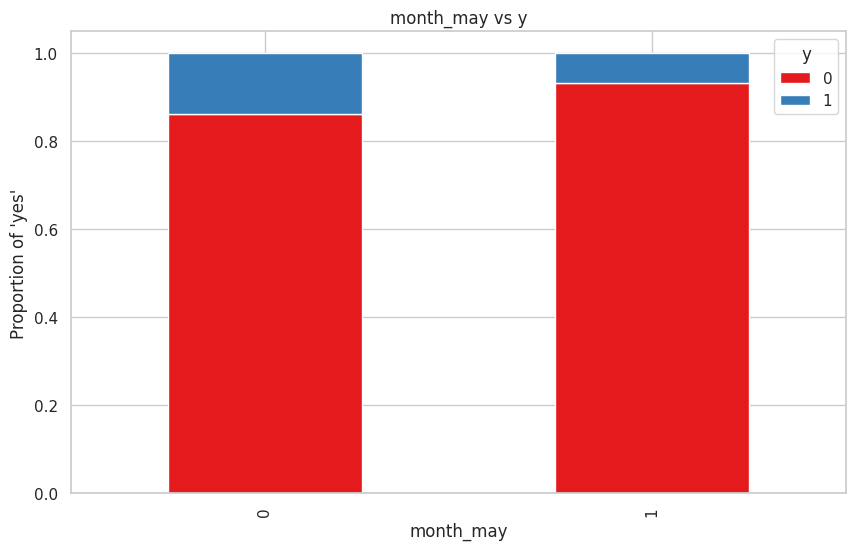

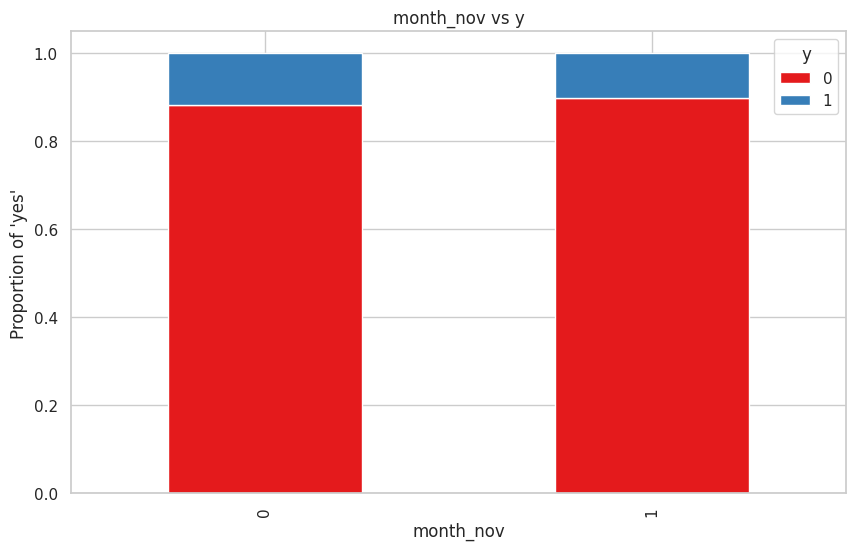

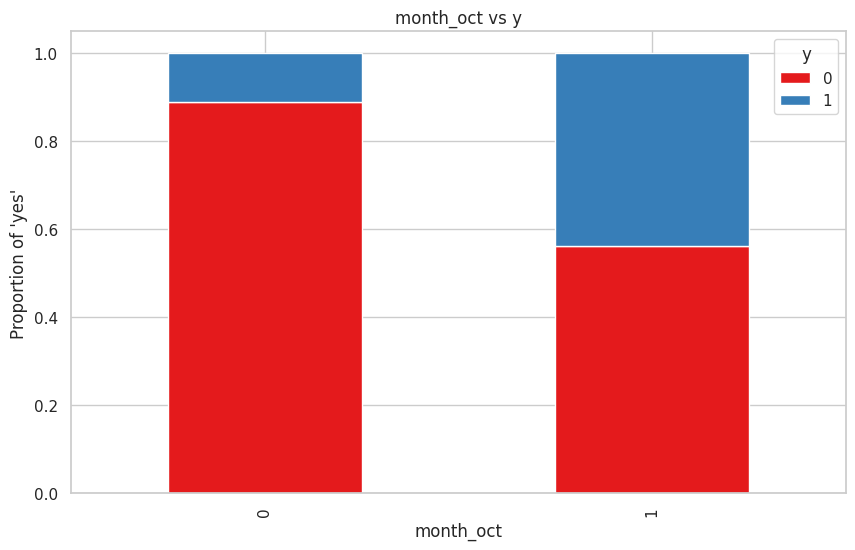

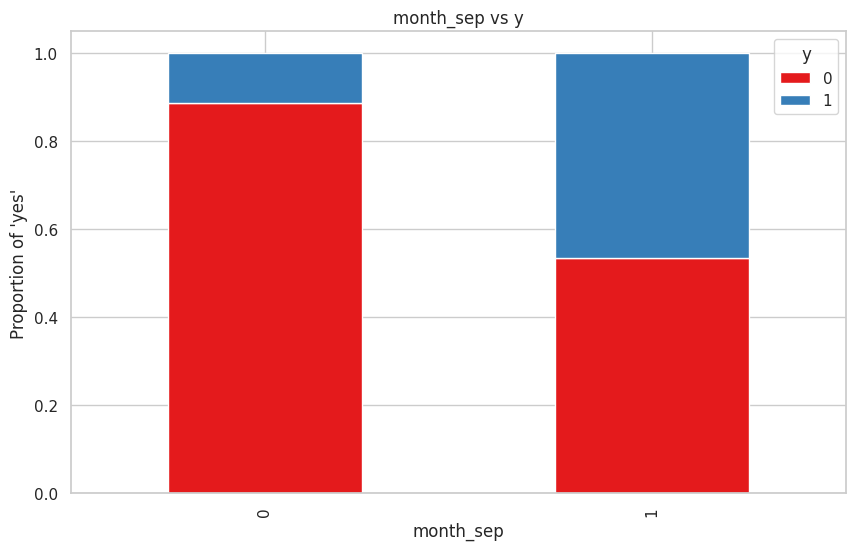

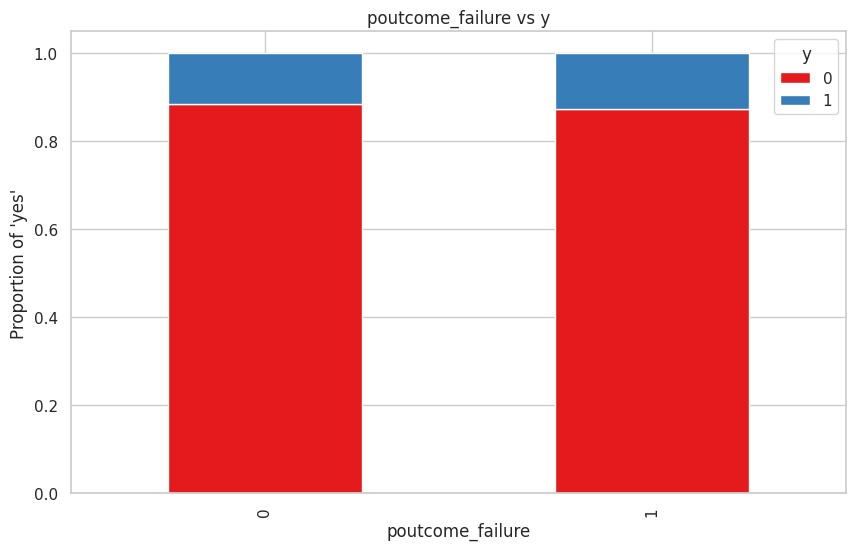

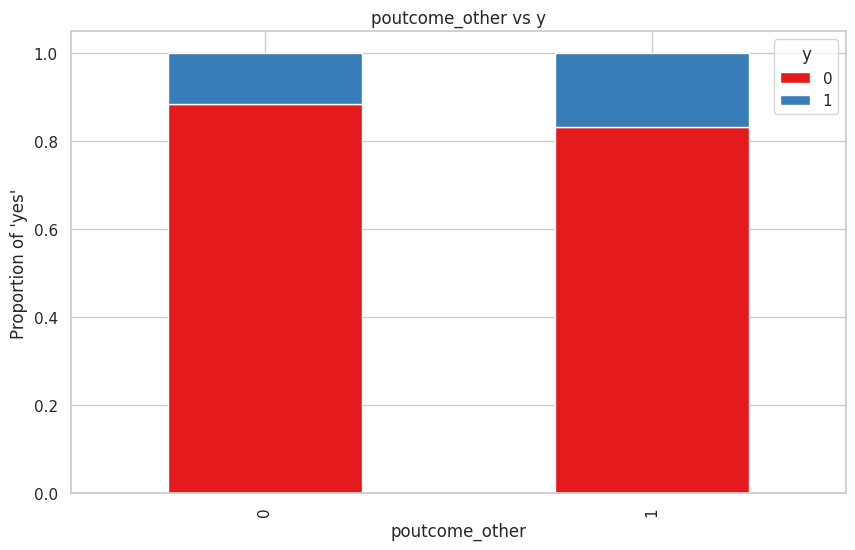

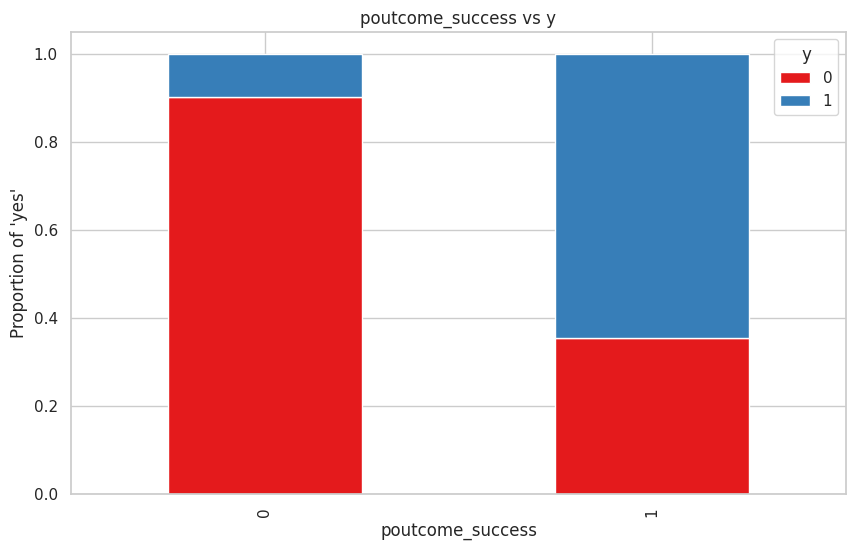

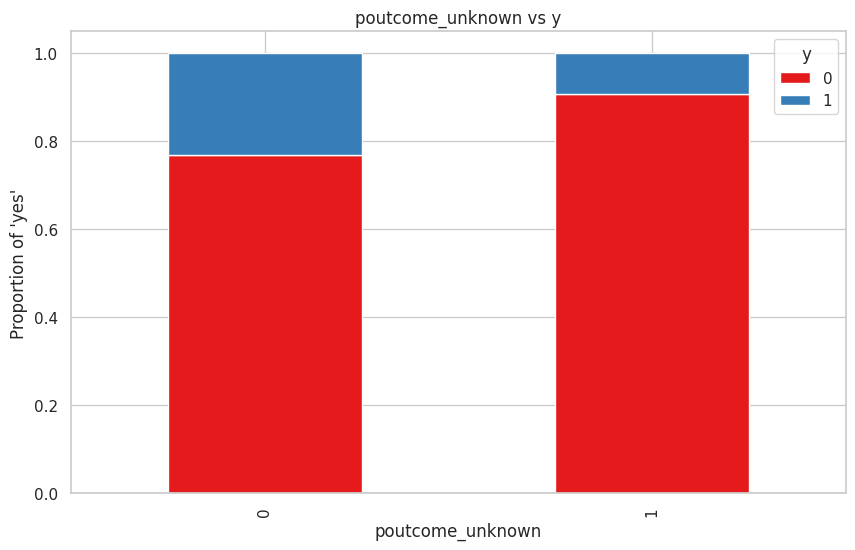

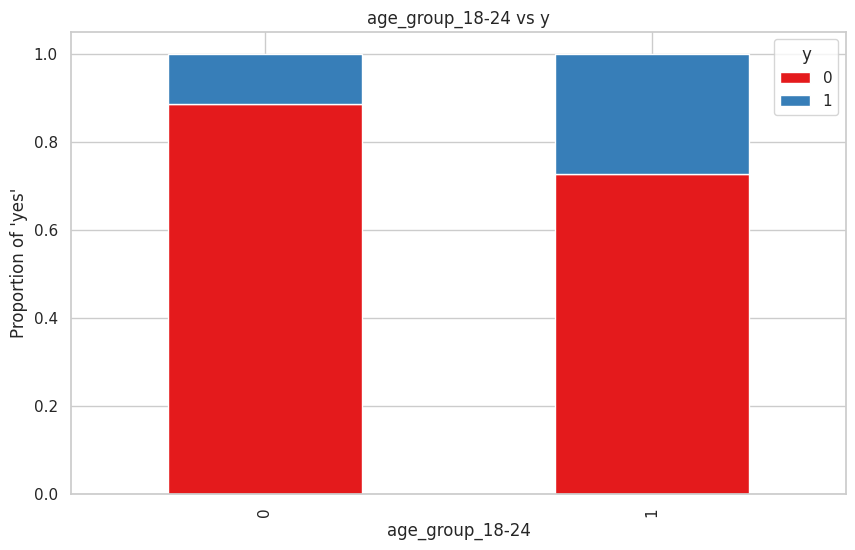

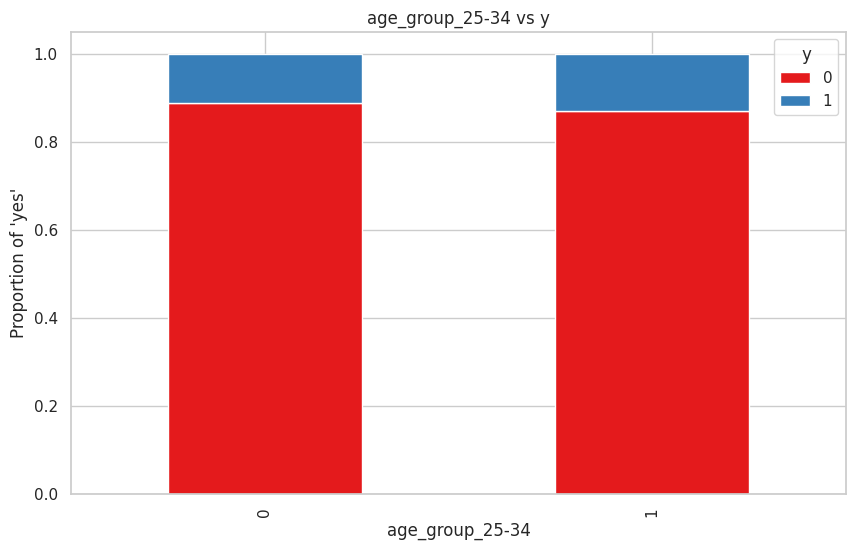

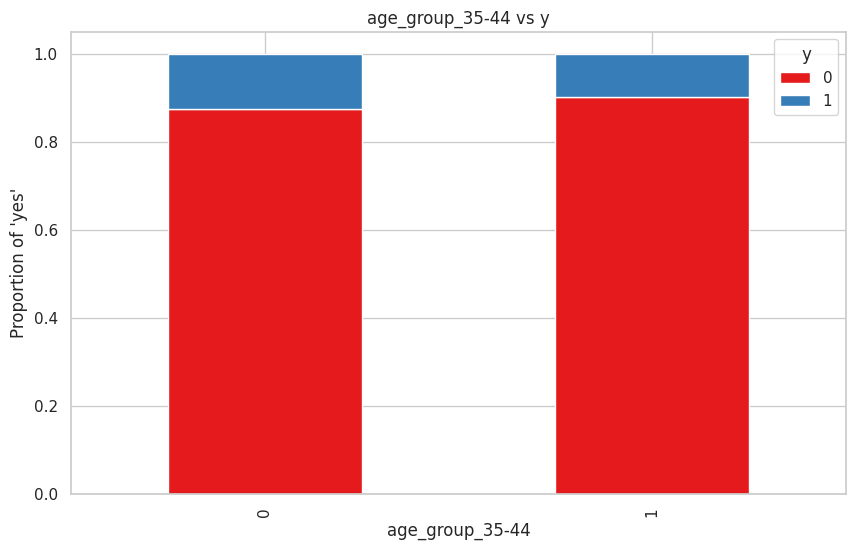

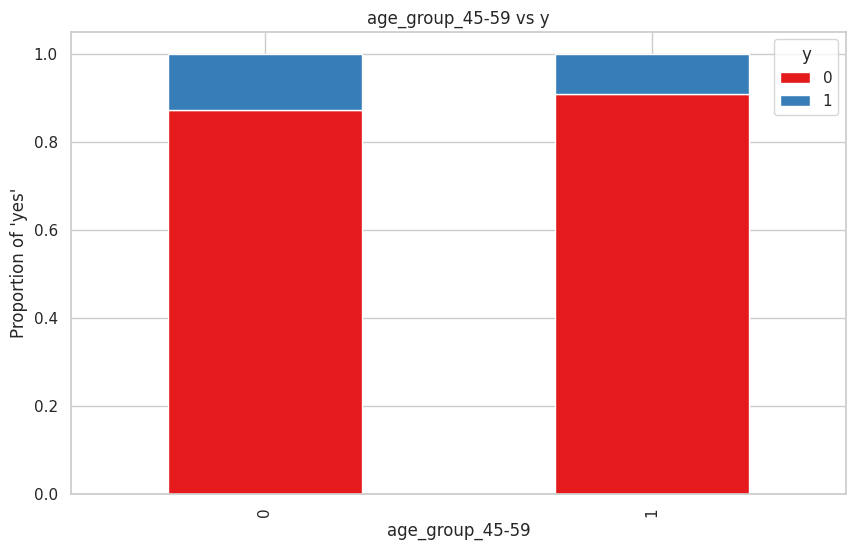

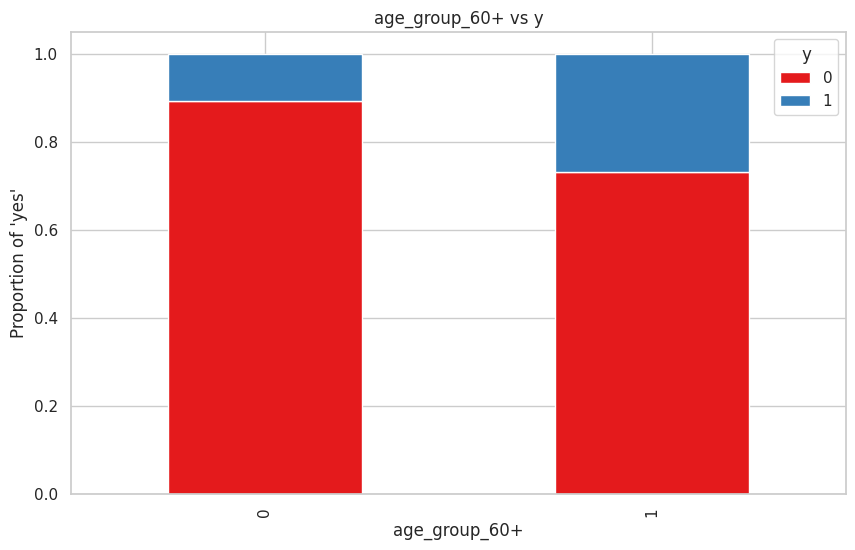

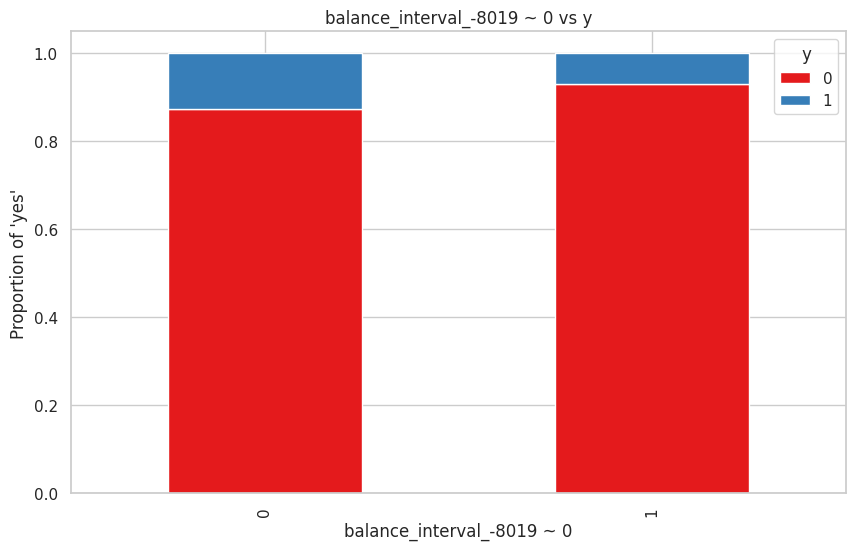

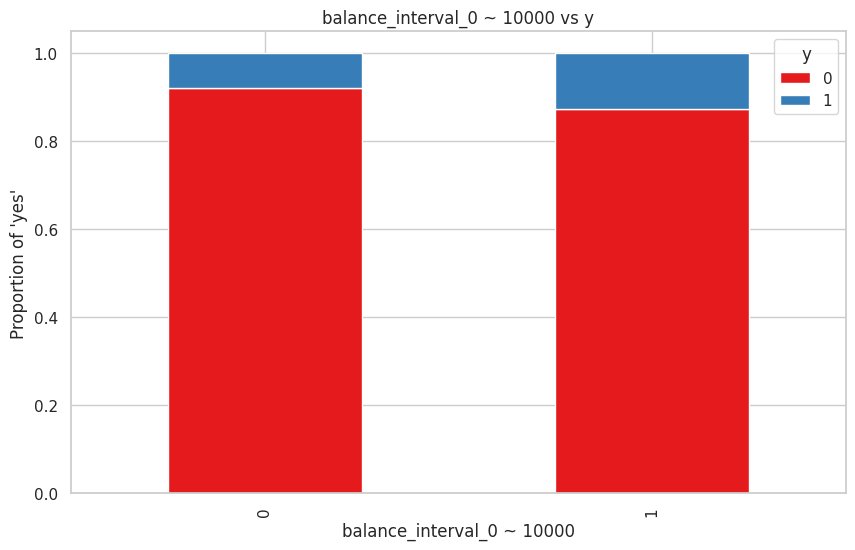

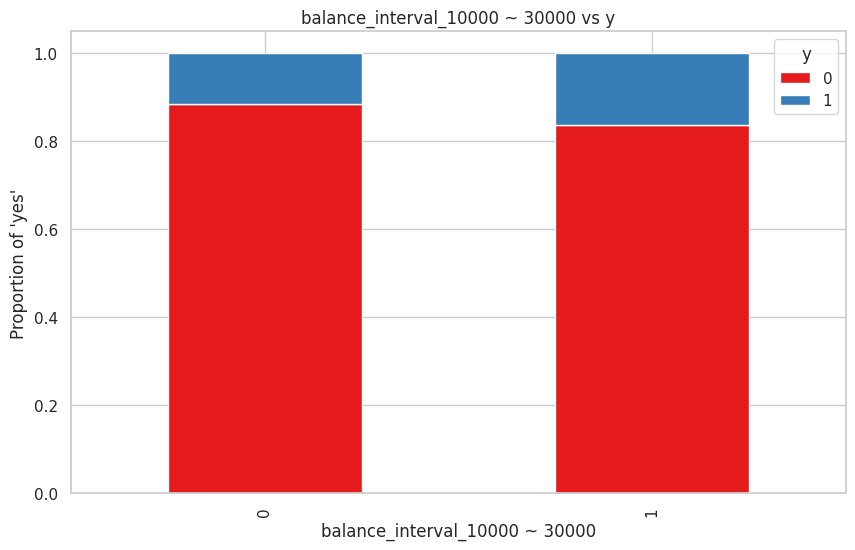

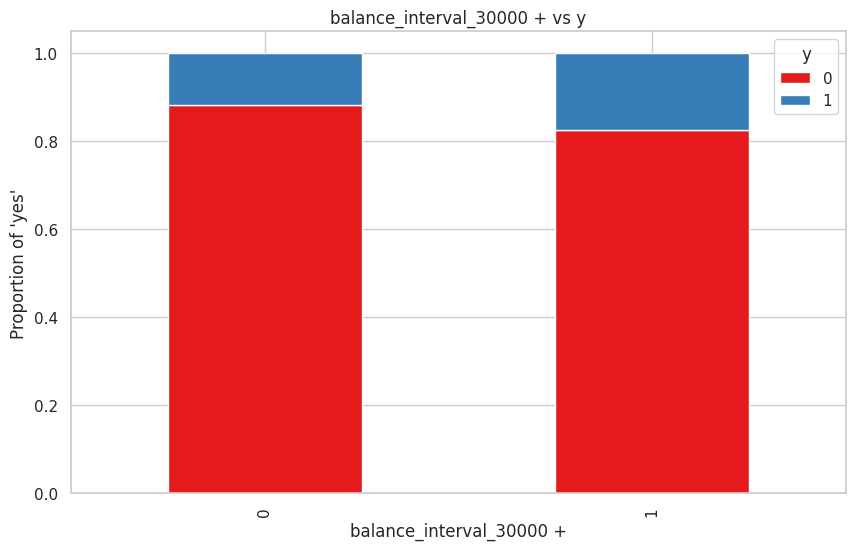

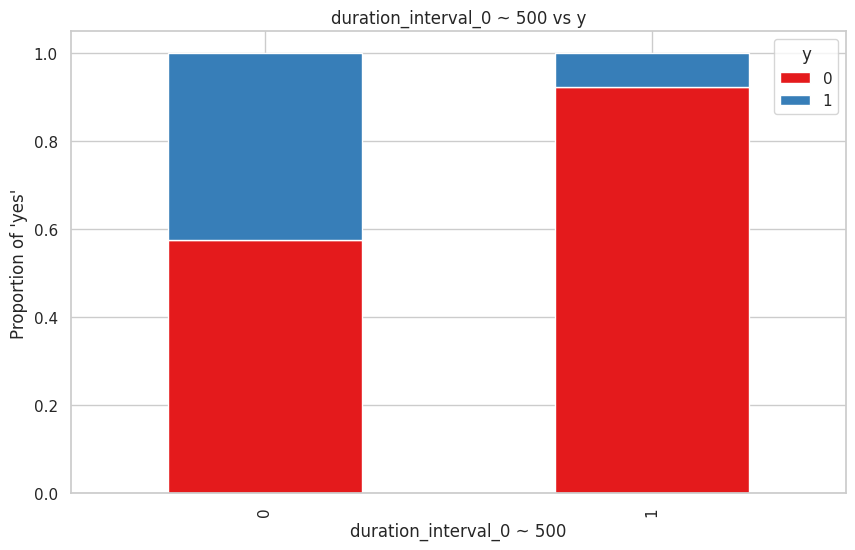

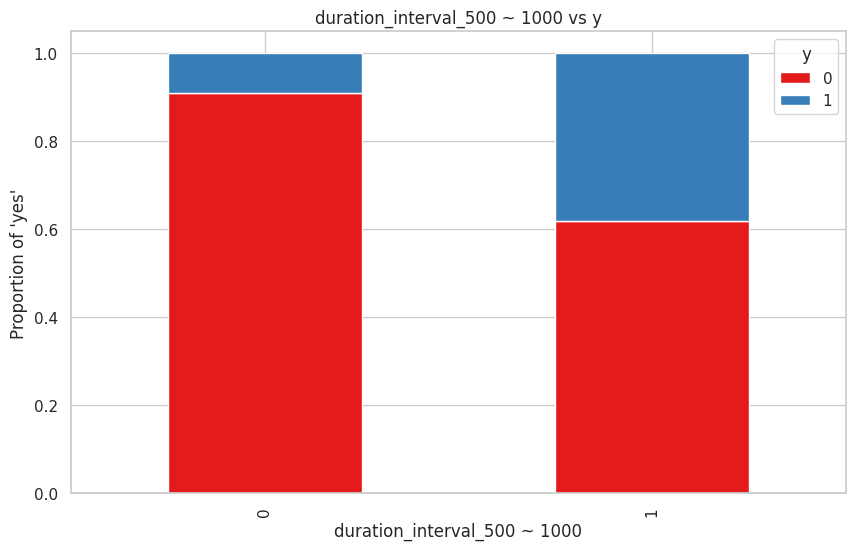

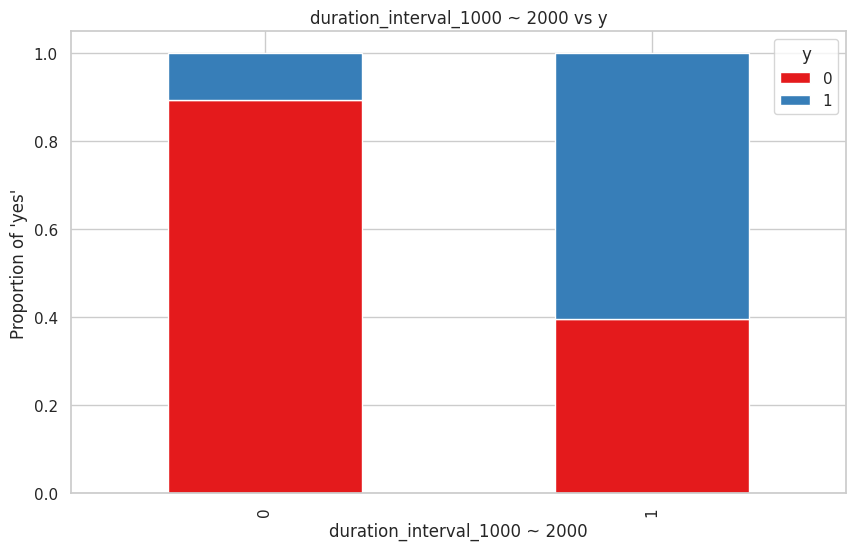

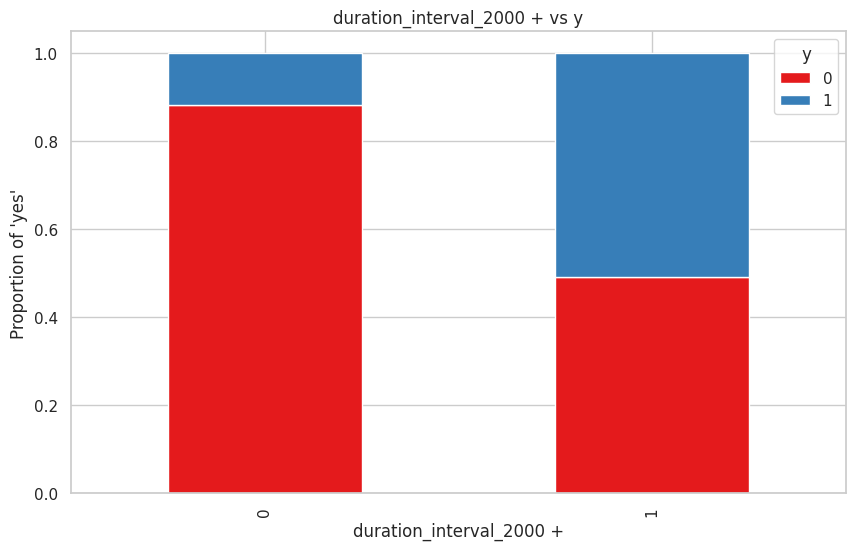

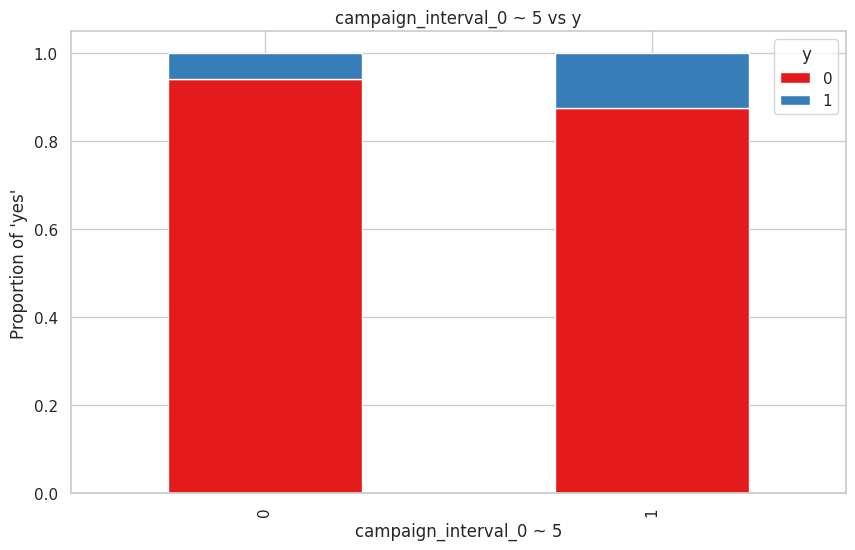

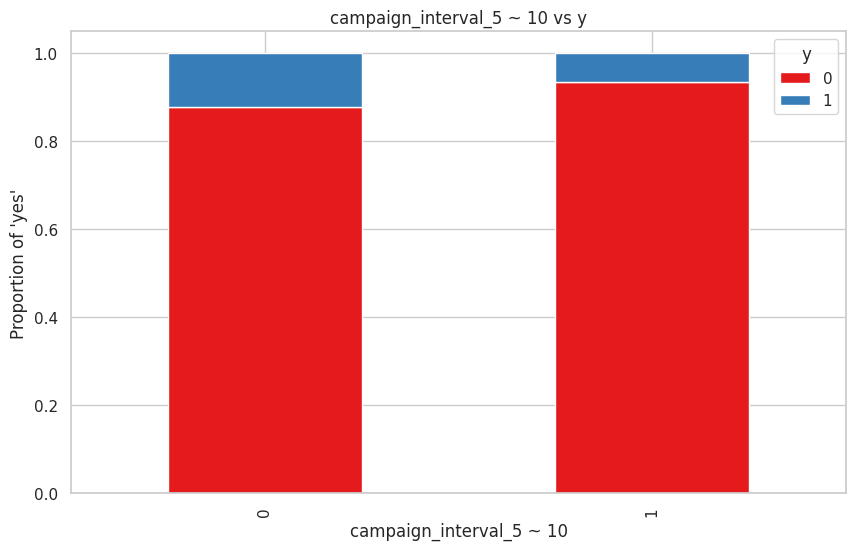

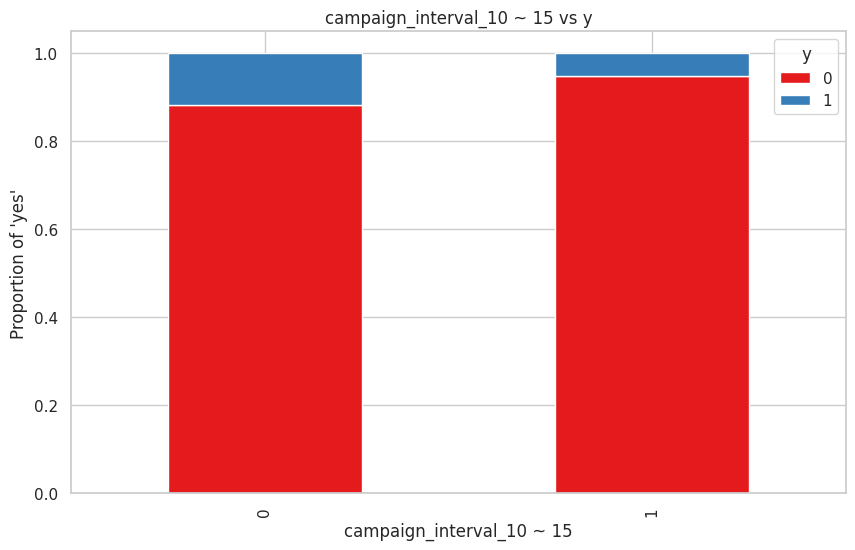

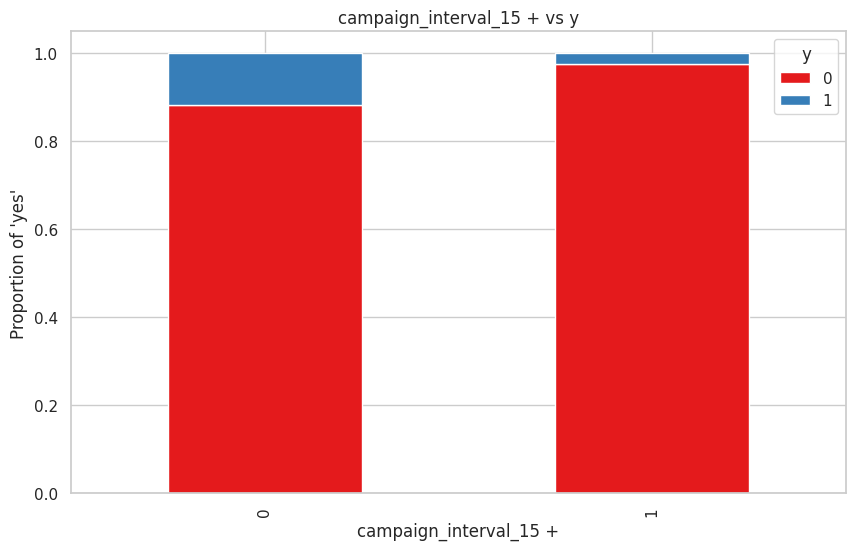

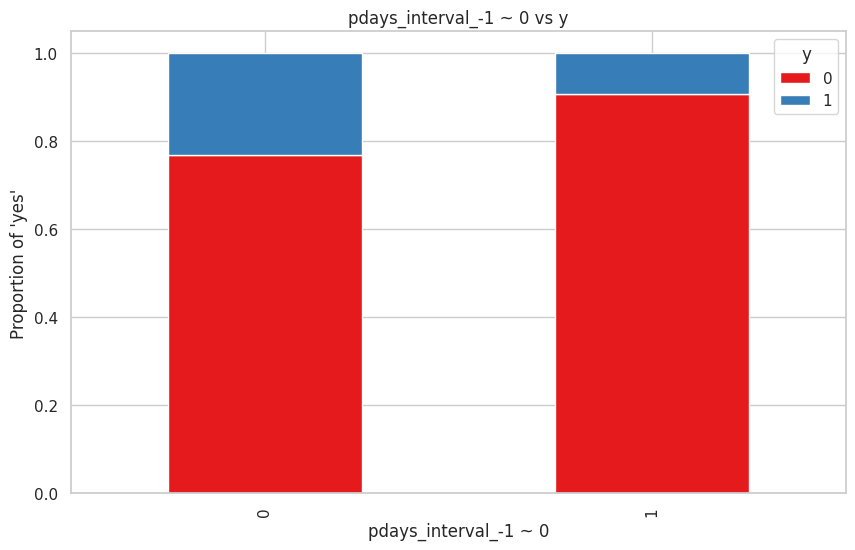

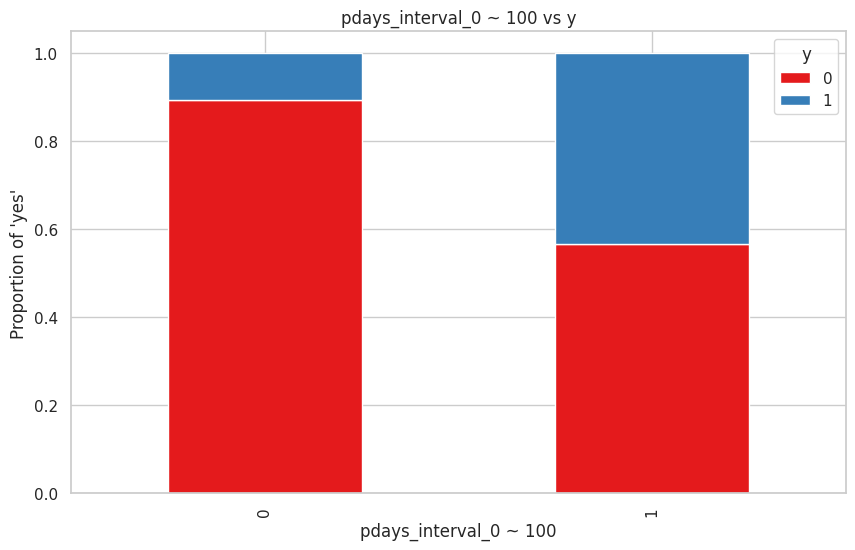

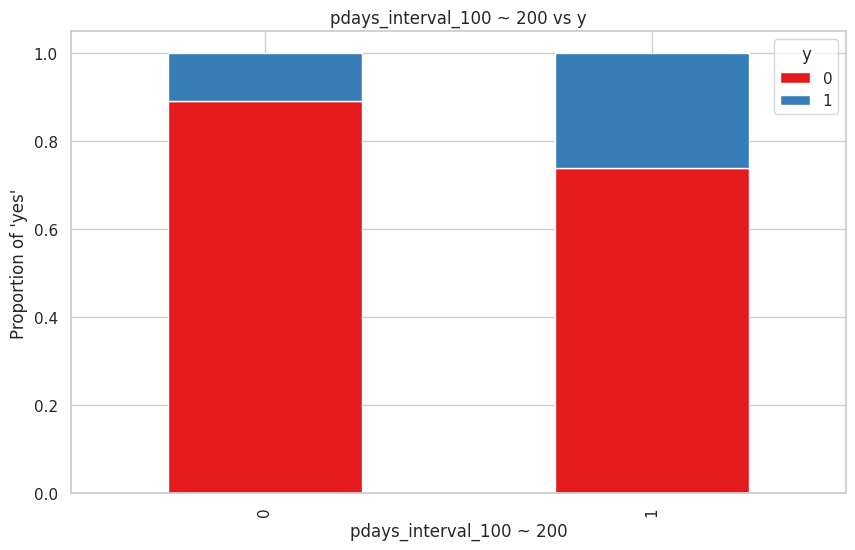

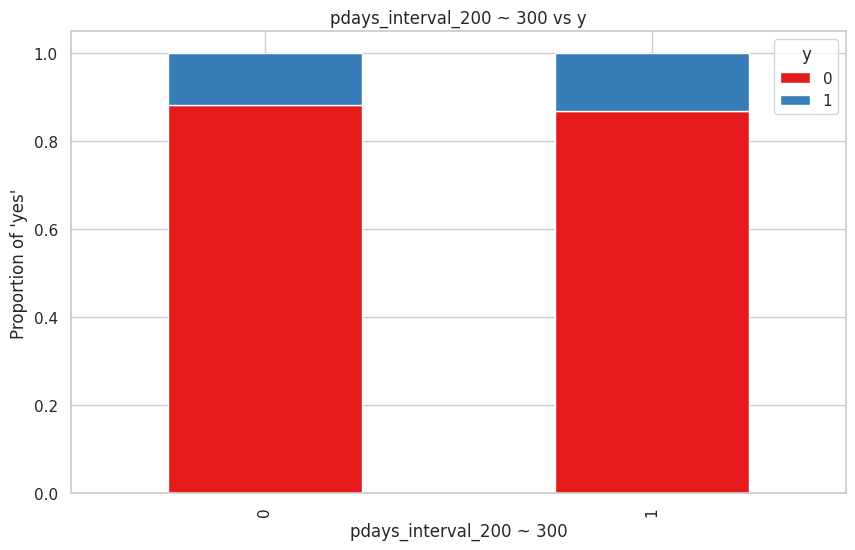

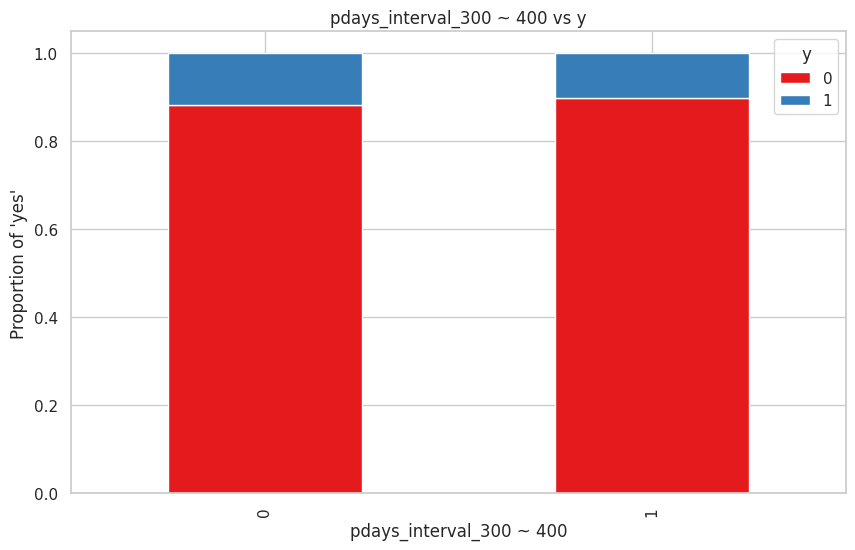

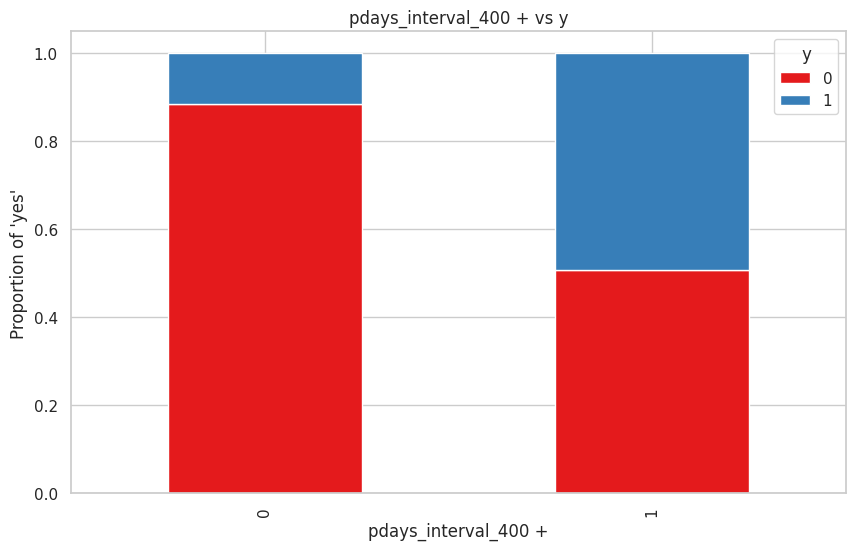

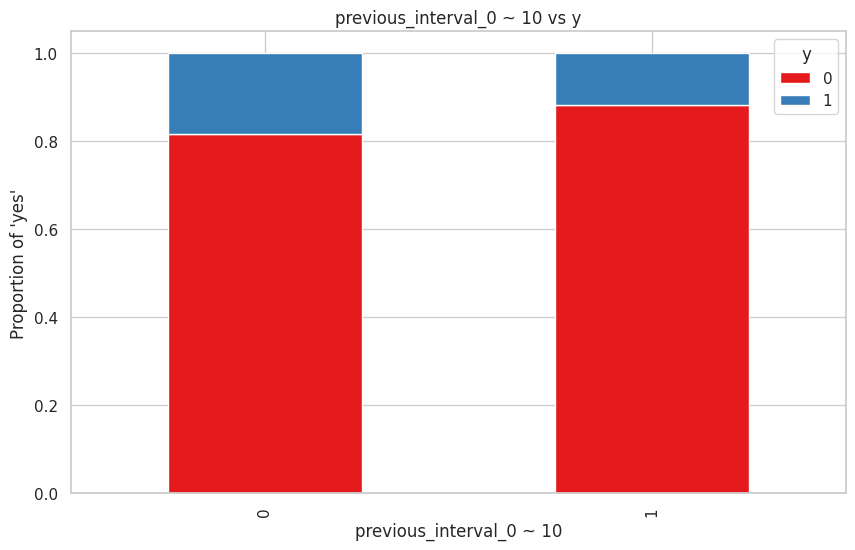

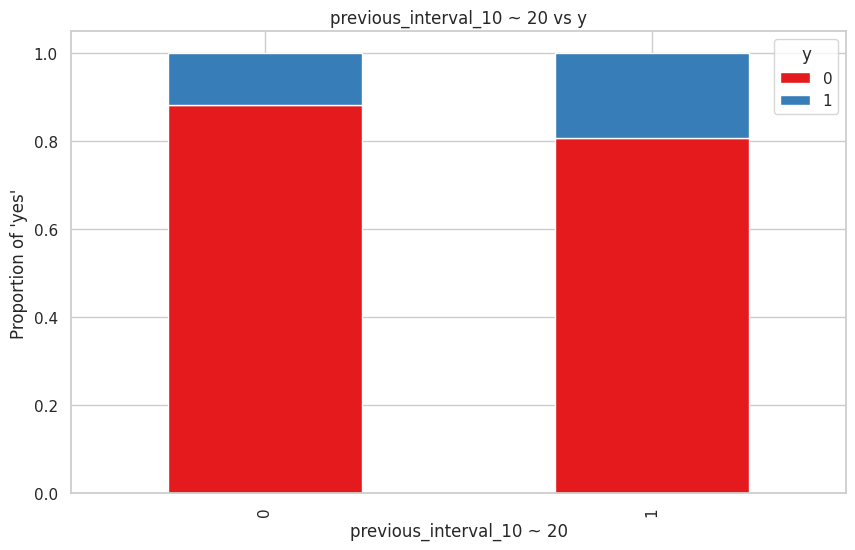

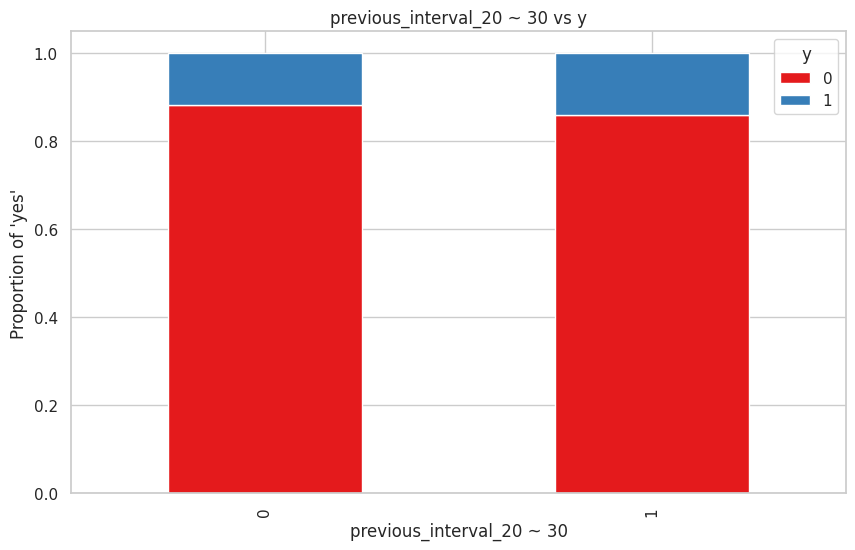

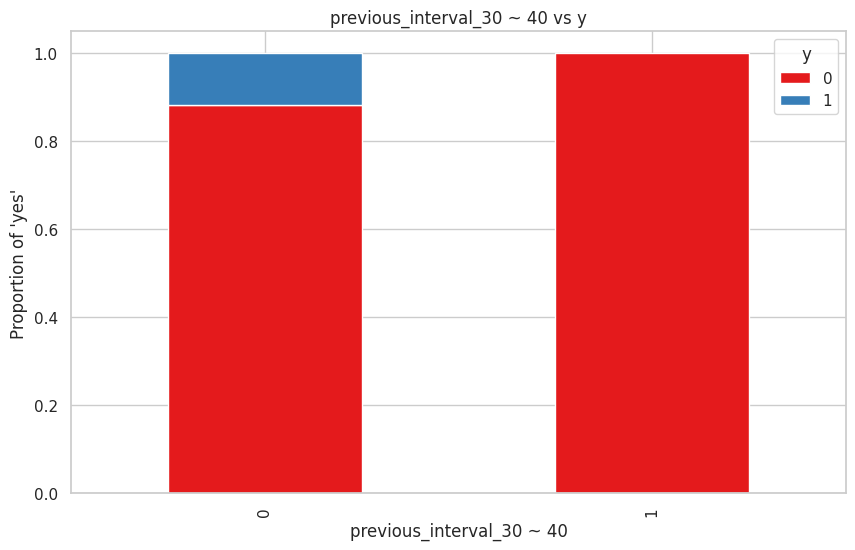

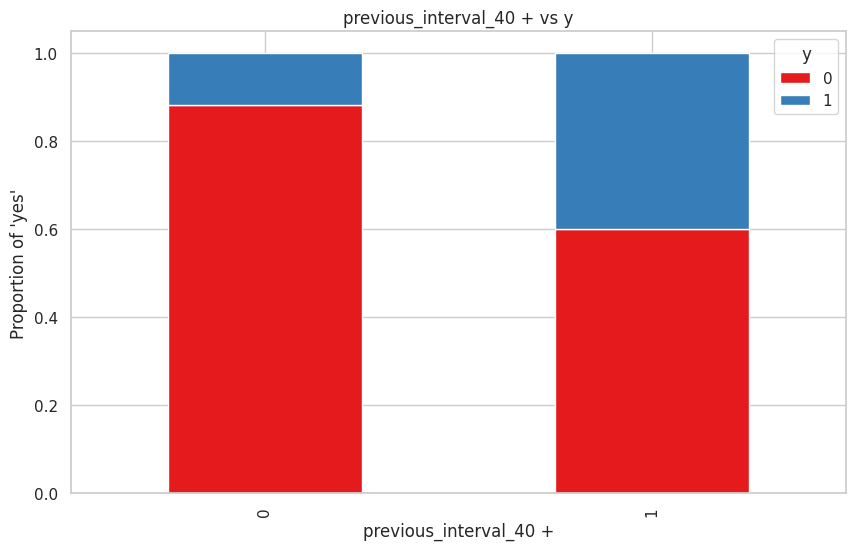

In [ ]:
# Bivariate analysis with the target variable 'y' using stacked bar plots
def bivariate_analysis(data, target_variable):
    # List of variables
    variables = ['default', 'housing', 'loan', 'job_Employee', 'job_Manual Labour', 'job_Retired',
                       'job_Self Employed', 'job_Student', 'job_Unemployed', 'job_unknown', 'marital_divorced',
                       'marital_married', 'marital_single', 'education_primary', 'education_secondary',
                       'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone',
                       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
                       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
                       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age_group_18-24', 'age_group_25-34',
                       'age_group_35-44', 'age_group_45-59', 'age_group_60+', 'balance_interval_-8019 ~ 0',
                       'balance_interval_0 ~ 10000', 'balance_interval_10000 ~ 30000', 'balance_interval_30000 +',
                       'duration_interval_0 ~ 500', 'duration_interval_500 ~ 1000', 'duration_interval_1000 ~ 2000',
                       'duration_interval_2000 +', 'campaign_interval_0 ~ 5', 'campaign_interval_5 ~ 10',
                       'campaign_interval_10 ~ 15', 'campaign_interval_15 +', 'pdays_interval_-1 ~ 0',
                       'pdays_interval_0 ~ 100', 'pdays_interval_100 ~ 200', 'pdays_interval_200 ~ 300',
                       'pdays_interval_300 ~ 400', 'pdays_interval_400 +', 'previous_interval_0 ~ 10',
                       'previous_interval_10 ~ 20', 'previous_interval_20 ~ 30', 'previous_interval_30 ~ 40',
                       'previous_interval_40 +']

    for feature in variables:
        # Create a crosstab (contingency table) to examine the relationship
        crosstab = pd.crosstab(data[feature], data[target_variable])

        # Calculate the proportion of 'yes' (1) within each category
        crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)

        # Create a stacked bar plot
        sns.set_palette("Set1")  # Set a color palette
        ax = crosstab.plot(kind="bar", stacked=True, figsize=(10, 6))
        ax.set_title(f"{feature} vs {target_variable}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Proportion of 'yes'")
        plt.show()

bivariate_analysis(bd, "y")

**Logistic Regression Model**

**Confusion Matrix:**



In [ ]:
# Specify the features, including the age_group columns
X = bd.drop(columns=['y'])

# Separate the target variable
y = bd['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[7729  223]
 [ 739  352]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.61      0.32      0.42      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043



**Decision Tree**

In [ ]:
# Separating the features and target variable
X = bd.drop(columns=['y'])  # Features
y = bd['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.87
Confusion Matrix:
[[7395  557]
 [ 592  499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.46      0.46      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.69      0.70      9043
weighted avg       0.87      0.87      0.87      9043



In [ ]:
#ROC

# Separating the features and target variable
X = bd.drop(columns=['y'])  # Features
y = bd['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.2f}")



Accuracy: 0.87
Confusion Matrix:
[[7392  560]
 [ 596  495]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.45      0.46      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

AUC-ROC Score: 0.70


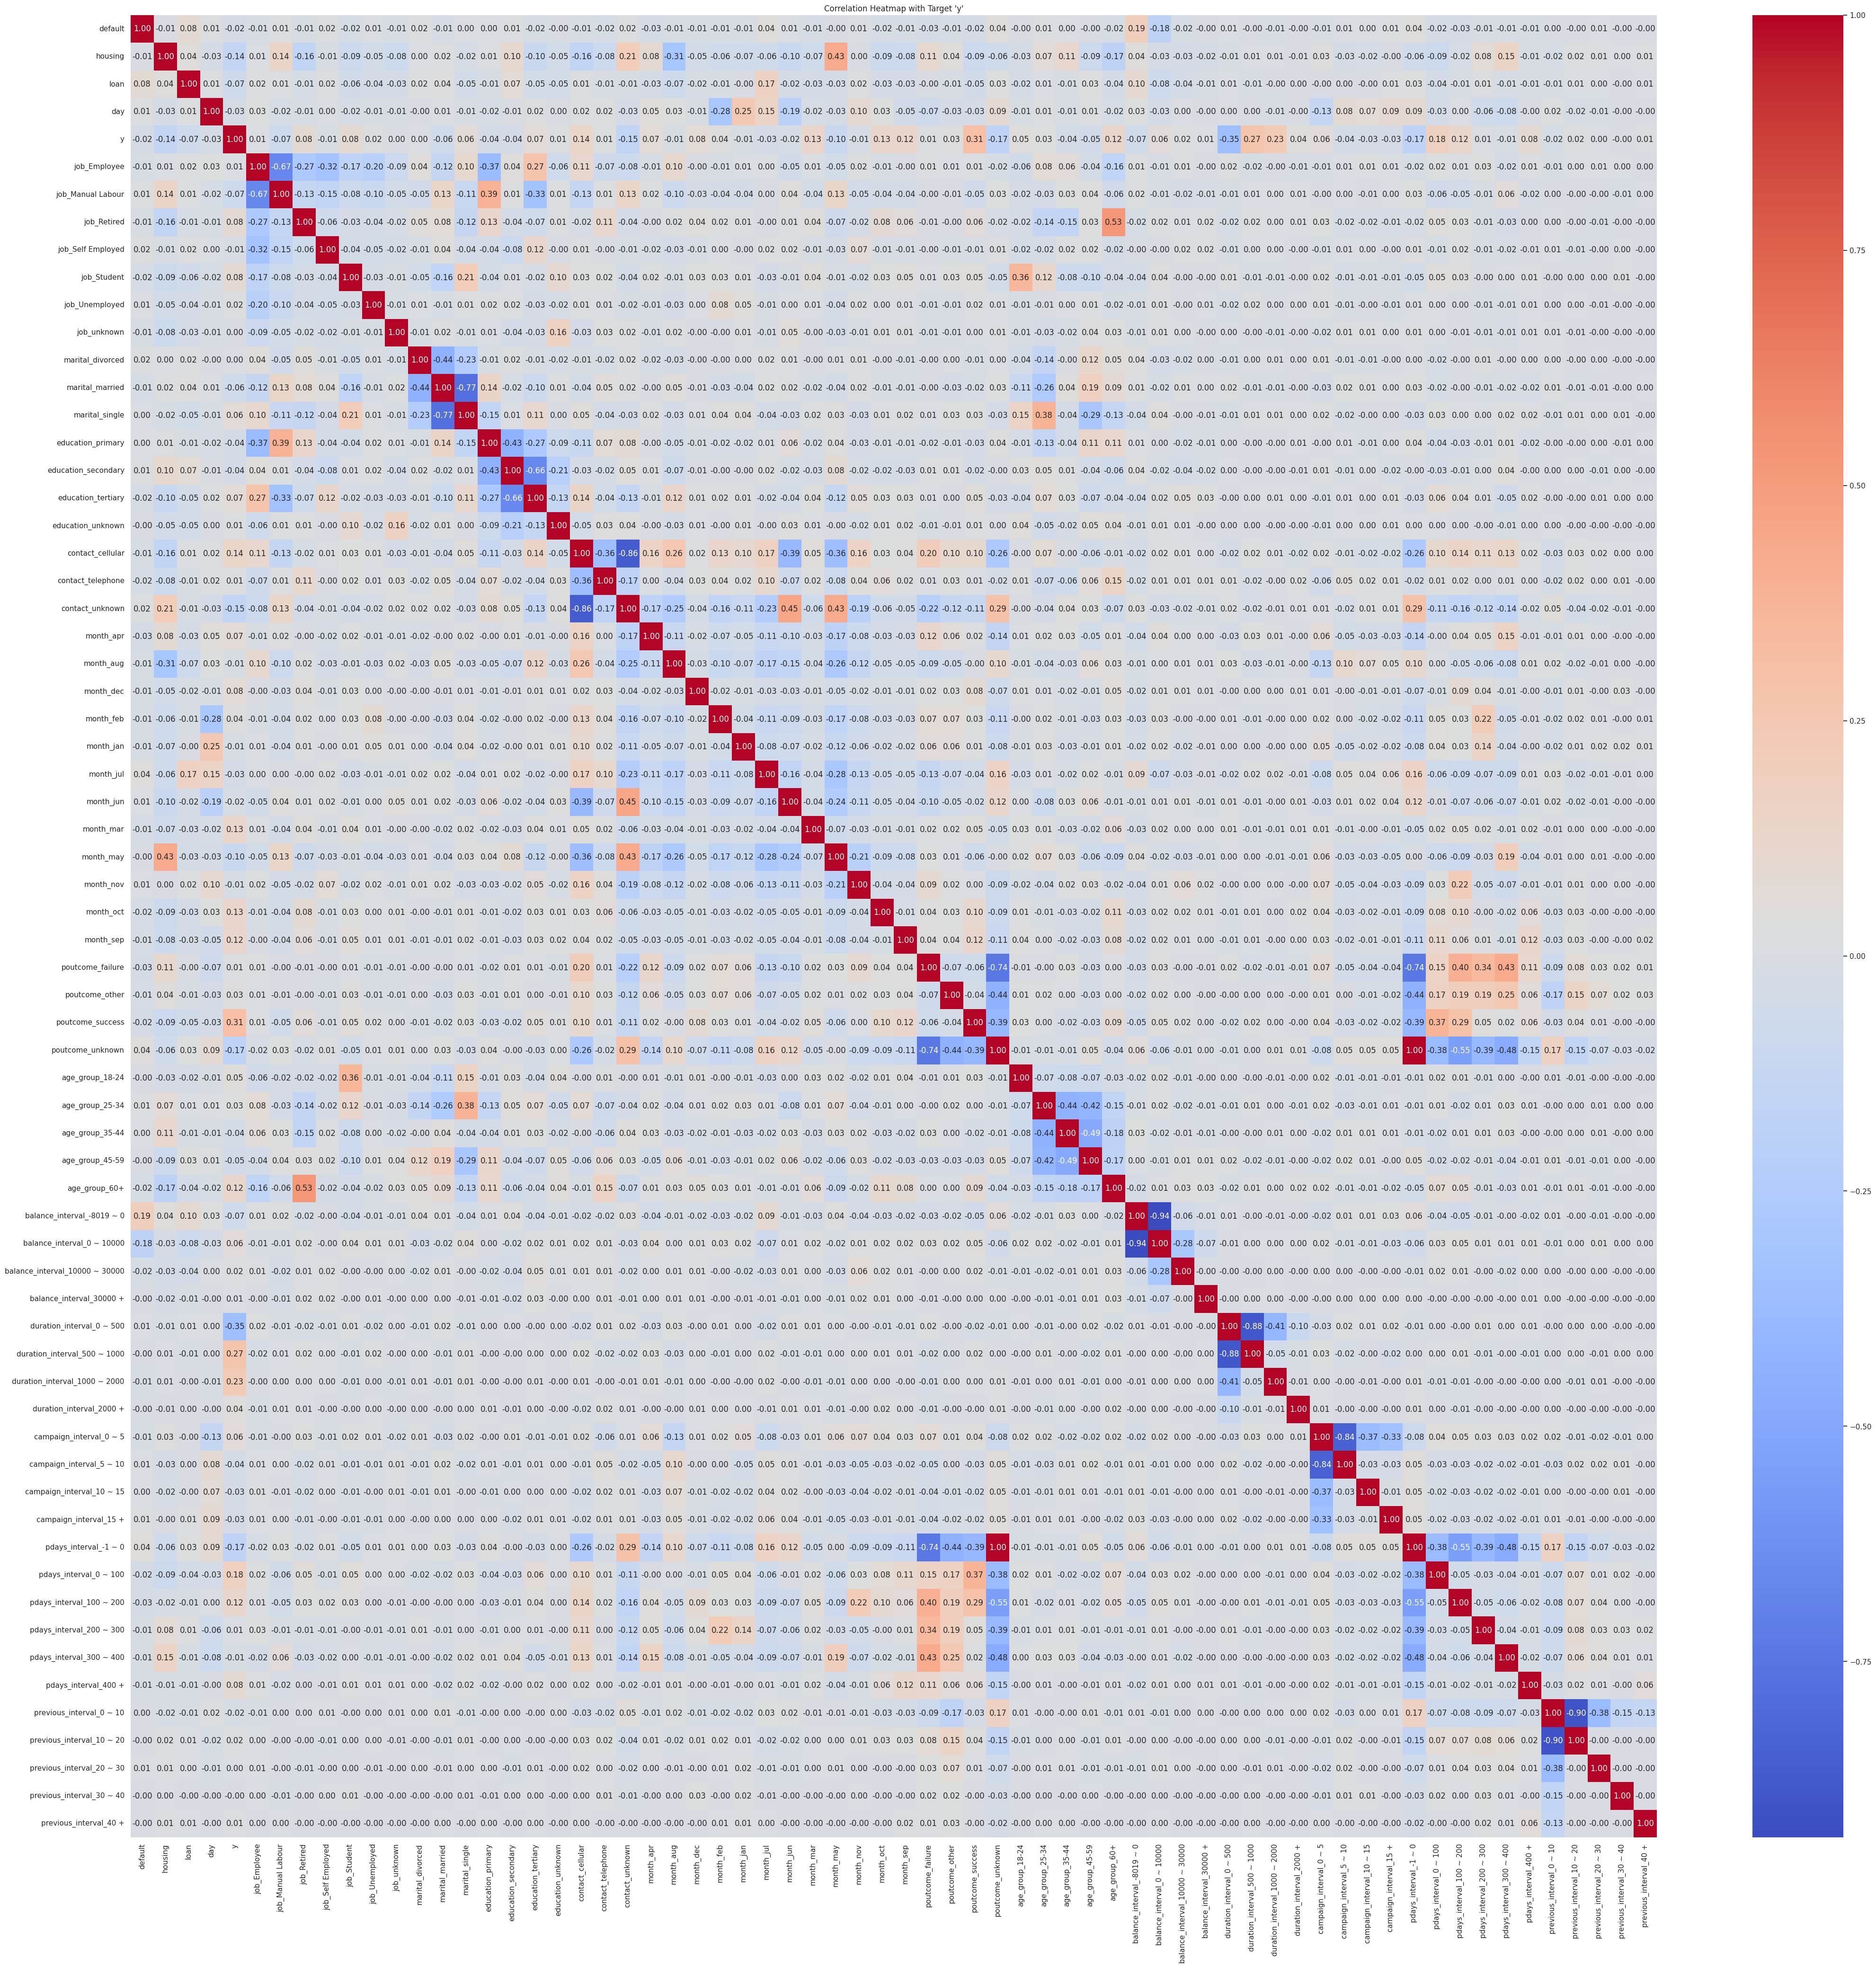

In [ ]:
# Calculate the correlation matrix
correlation_matrix = bd.corr()

# Create a heatmap
plt.figure(figsize=(52, 50))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Target 'y'")
plt.show()
